In [1]:
# Install condacolab
!pip install -q condacolab
import condacolab
condacolab.install()


⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:07
🔁 Restarting kernel...


In [1]:
# Install CIL and add astra to the path
!mamba install -c conda-forge -c https://software.repos.intel.com/python/conda -c ccpi cil=24.0.0 astra-toolbox=*=cuda* tigre ccpi-regulariser tomophantom ipywidgets



Looking for: ['cil=24.0.0', 'astra-toolbox=[build=cuda*]', 'tigre', 'ccpi-regulariser', 'tomophantom', 'ipywidgets']

[+] 0.0s
[+] 0.1s
https://software.r..  ⣾  [+] 0.2s
https://software.r..  ⣾  [+] 0.3s
https://software.r..  ⣾  [+] 0.4s
https://software.r..  ⣾  https://software.repos.intel.com/python/conda/li..
[+] 0.0s
https://software.r..  ⣾  [+] 0.1s
https://software.r..  ⣾  [+] 0.2s
https://software.r..  ⣾  https://software.repos.intel.com/python/conda/no..
[+] 0.0s
[+] 0.1s
ccpi/linux-64 (che..  ⣾  [+] 0.2s
ccpi/linux-64 (che..  ⣾  ccpi/linux-64 (check zst)                         
[+] 0.0s
[+] 0.1s
ccpi/noarch (check..  ⣾  ccpi/noarch (check zst)                           
[+] 0.0s
[+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  
https://software.r..   5%
https://software.r..  ⣾  
ccpi/linux-64         ⣾  https://software.repos.intel.com/python/conda/no..
https://software.repos.intel.com/python/conda/li..
[+] 0.2s
conda-forge/linux-64   1%
conda-forge/noarch     1%


In [2]:
# Install Pytorch
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121


Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.9/798.9 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 108.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 94.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 111.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 85.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 108.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4

In [ ]:
!pip install torchviz # optional if visualization of computational graph is needed

In [3]:
import os
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as transforms
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torchviz import make_dot
from torchsummary import summary
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from matplotlib.patches import Ellipse
from scipy.stats import poisson
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools

from cil.utilities import noise
from cil.framework import ImageData, ImageGeometry, DataContainer ,AcquisitionGeometry, AcquisitionData
from cil.plugins.astra.operators import ProjectionOperator
from cil.plugins.astra.processors import FBP
from cil.utilities.display import show2D, show1D, show_geometry
from cil.optimisation.functions import L2NormSquared, BlockFunction, IndicatorBox, LeastSquares

from cil.utilities import noise

from cil.plugins.astra.operators import ProjectionOperator
from cil.plugins.astra.processors import FBP
from cil.plugins import TomoPhantom

from cil.optimisation.algorithms import Algorithm
from cil.optimisation.functions import Function
from cil.optimisation.algorithms import GD
from warnings import warn
from numbers import Real

from cil.optimisation.operators import LinearOperator

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Creating Custom Dataset**

In [ ]:
# Function to create a circular mask
def create_circular_mask(h, w, center=None, radius=None):
    if center is None:
        # Set the center to the middle of the image if not provided
        center = (int(w/2), int(h/2))
    if radius is None:
        # Set the radius to the largest possible circle within the image
        radius = min(center[0], center[1], w-center[0], h-center[1])

    # Create a grid of coordinates
    Y, X = np.ogrid[:h, :w]
    # Calculate the distance of each point from the center
    dist_from_center = np.sqrt((X - center[0])**2 + (Y - center[1])**2)
    # Create a mask where points within the radius are True
    mask = dist_from_center <= radius
    return mask

# Function to generate images with random ellipses
def generate_ellipse_images(num_images, image_size=(256, 256), lambda_param=5, dpi=300, output_dir='/content/drive/My Drive/image', display=False):
    if not os.path.exists(output_dir):
        # Create output directory if it doesn't exist
        os.makedirs(output_dir)

    for img_index in range(1, num_images + 1):
        # Determine the number of ellipses using Poisson distribution
        num_ellipses = poisson.rvs(mu=lambda_param)

        # Create a new figure and axis
        fig, ax = plt.subplots(figsize=(image_size[0] / dpi, image_size[1] / dpi), dpi=dpi)
        ax.set_xlim(0, image_size[0])
        ax.set_ylim(0, image_size[1])

        # Create a circular mask
        mask_radius = min(image_size) / 2 * 0.6  # 60% of half the minimum dimension
        mask_center = (image_size[0] // 2, image_size[1] // 2)
        mask = create_circular_mask(image_size[1], image_size[0], center=mask_center, radius=mask_radius)

        ax.set_facecolor('black')  # Set background color to black

        for _ in range(num_ellipses):
            while True:
                # Randomly generate ellipse properties
                width, height = np.random.uniform(0.1, 1, 2) * min(image_size) / 10
                angle = np.random.uniform(0, 180)
                center_x = np.random.randint(width // 2, image_size[0] - width // 2)
                center_y = np.random.randint(height // 2, image_size[1] - height // 2)
                # Check if the center of the ellipse is within the mask
                if mask[center_y, center_x]:
                    break

            # Create and add ellipse to the plot
            ellipse = Ellipse(xy=(center_x, center_y), width=width, height=height, angle=angle, edgecolor='white', facecolor='none')
            ax.add_patch(ellipse)

        ax.set_aspect('equal')  # Set equal scaling for x and y axes
        plt.axis('off')  # Turn off the axis
        plt.tight_layout(pad=0)  # Remove padding around the plot

        # Save the figure to a file
        file_path_temp = os.path.join(output_dir, f'ellipse_{img_index}.png')
        plt.savefig(file_path_temp, bbox_inches='tight', pad_inches=0, facecolor='black')
        plt.close()

        # Open the saved image and convert to grayscale
        img = Image.open(file_path_temp).convert('L')
        img_array = np.array(img)

        # Save the final processed image
        img_final = Image.fromarray(img_array)
        img_final.save(file_path_temp)

        # Optionally display the image
        # if display:
        #     plt.imshow(img_array, cmap='gray')
        #     plt.title(f"Generated Image {img_index}")
        #     plt.axis('off')
        #     plt.show()

# Example usage: Save generated images directly to Google Drive
generate_ellipse_images(num_images=100, image_size=(128, 128), lambda_param=5, dpi=100, output_dir="/content/drive/My Drive/test_data", display=False)


# **Filtered Back Projection Reconctruction Using CIL**

In [5]:
Directory paths
base_directory = '/content/drive/My Drive/test_data/'
real_image_directory = os.path.join(base_directory, 'real_images')
fbp_directory = os.path.join(base_directory, 'fbp_images')

# Ensure directories exist
os.makedirs(real_image_directory, exist_ok=True)
os.makedirs(fbp_directory, exist_ok=True)

# Get the list of all image files in the base directory
files = [f for f in os.listdir(base_directory) if os.path.isfile(os.path.join(base_directory, f))]

# Parameters for projection
batch_size = 10
num_projections = 90
panel_size = 128  # images are 128 by 128
mean = 0
var = 0.5

# Defining function that loads an image from the given path, converts it to grayscale, resizes it to match the image geometry dimensions, and normalizes it to a [0, 1] range.
def load_image_as_projection_data(image_path, image_geometry):
    with Image.open(image_path) as img:
        img_gray = img.convert('L')
        img_resized = img_gray.resize((image_geometry.voxel_num_x, image_geometry.voxel_num_y))
        image_array = np.array(img_resized, dtype=np.float32)
        image_array /= 255.0
        return ImageData(image_array, geometry=image_geometry)

# Defining a function that adds gaussian noise to a sinogram
def add_noise(sinogram, mean=0, var=0.01):
    sino_array = sinogram.as_array()
    noise = np.random.normal(mean, np.sqrt(var), sino_array.shape)
    noisy_sino_array = sino_array + noise
    noisy_sino_array[noisy_sino_array < 0] = 0
    noisy_sino = AcquisitionData(noisy_sino_array, geometry=sinogram.geometry)
    return noisy_sino

# Defining a function that  Processes an image: loads it, generates a sinogram, adds noise, and performs FBP reconstruction
def process_image(image_path, num_projections, panel_size, mean=0, var=0.1):
    ig = ImageGeometry(voxel_num_x=panel_size, voxel_num_y=panel_size)
    image_data = load_image_as_projection_data(image_path, ig)
    angles = np.linspace(0, 180, num_projections, endpoint=False, dtype=np.float32)
    ag = AcquisitionGeometry.create_Parallel2D()
    ag.set_angles(angles)
    ag.set_panel(panel_size)
    A = ProjectionOperator(ig, ag, device='cpu')
    sino = A.direct(image_data)
    noisy_sino = add_noise(sino, mean, var)
    fbp = FBP(ig, ag, device='cpu')
    fbp_recon = fbp(noisy_sino)
    return image_data, noisy_sino, fbp_recon

# Defining a function that saves an image (as a numpy array) to the specified path in grayscale.
def save_image(image, path):
    plt.imsave(path, image, cmap='gray')

# Defining a function that processes a batch of images: for each image, generate a noisy sinogram, perform FBP reconstruction, and save both the original and reconstructed images.
def process_batch(batch_files, num_projections, panel_size, mean=0, var=0.01):
    for i, image_file in enumerate(batch_files):
        image_path = os.path.join(base_directory, image_file)
        image_data, noisy_sino, fbp_recon = process_image(image_path, num_projections, panel_size, mean, var)
        base_name = os.path.splitext(image_file)[0]
        real_image_path = os.path.join(real_image_directory, f'{base_name}_real.png')
        fbp_image_path = os.path.join(fbp_directory, f'{base_name}_fbp.png')
        save_image(image_data.as_array(), real_image_path)
        save_image(fbp_recon.as_array(), fbp_image_path)

        # Display the results (optional)
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        axes[0].imshow(image_data.as_array(), cmap='gray')
        axes[0].set_title(f'Original Image {i + 1}')
        axes[1].imshow(noisy_sino.as_array(), cmap='gray', aspect='auto')
        axes[1].set_title(f'Noisy Sinogram {i + 1}')
        axes[2].imshow(fbp_recon.as_array(), cmap='gray')
        axes[2].set_title(f'FBP Reconstruction {i + 1}')
        plt.show()

# Determine number of batches
num_batches = len(files) // batch_size + (1 if len(files) % batch_size != 0 else 0)

# Loop over the batches and process them
for batch_index in range(num_batches):
    batch_start = batch_index * batch_size
    batch_end = min(batch_start + batch_size, len(files))
    batch_files = files[batch_start:batch_end]
    process_batch(batch_files, num_projections, panel_size, mean, var)

## **Training Regularizer**

In [6]:

class EllipseDataset(Dataset):
    def __init__(self, real_image_dir, fbp_image_dir, transform=None):
        self.real_image_dir = real_image_dir
        self.fbp_image_dir = fbp_image_dir
        self.real_image_list = sorted(os.listdir(real_image_dir))
        self.fbp_image_list = sorted(os.listdir(fbp_image_dir))
        self.transform = transform

    def __len__(self):
        return len(self.real_image_list)

    def __getitem__(self, idx):
        real_image_name = os.path.join(self.real_image_dir, self.real_image_list[idx])
        fbp_image_name = os.path.join(self.fbp_image_dir, self.fbp_image_list[idx])

        real_image = Image.open(real_image_name).convert('L')
        fbp_image = Image.open(fbp_image_name).convert('L')


        if self.transform:
            real_image = self.transform(real_image)
            fbp_image = self.transform(fbp_image)

        return real_image, fbp_image



In [7]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalizes to mean 0, std 1 for single channel
])

real_image_dir = '/content/drive/My Drive/train_data/real_images'
fbp_image_dir = '/content/drive/My Drive/train_data/fbp_images'

# Create the full dataset
dataset = EllipseDataset(real_image_dir, fbp_image_dir, transform=transform)

# Split the dataset into training and testing sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoaders for each subset
train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=50, shuffle=False)

# Check the size of each subset
print(f'Training set size: {len(train_dataset)} images')
print(f'Testing set size: {len(test_dataset)} images')

# Example of iterating through the training DataLoader
for i, (real_images, fbp_images) in enumerate(train_loader):
    print(f'Train Batch {i + 1}')
    print(f'Real Images: {real_images.size()}')
    print(f'FBP Images: {fbp_images.size()}')

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


Training set size: 400 images
Testing set size: 100 images
Train Batch 1
Real Images: torch.Size([50, 1, 128, 128])
FBP Images: torch.Size([50, 1, 128, 128])
Train Batch 2
Real Images: torch.Size([50, 1, 128, 128])
FBP Images: torch.Size([50, 1, 128, 128])
Train Batch 3
Real Images: torch.Size([50, 1, 128, 128])
FBP Images: torch.Size([50, 1, 128, 128])
Train Batch 4
Real Images: torch.Size([50, 1, 128, 128])
FBP Images: torch.Size([50, 1, 128, 128])
Train Batch 5
Real Images: torch.Size([50, 1, 128, 128])
FBP Images: torch.Size([50, 1, 128, 128])
Train Batch 6
Real Images: torch.Size([50, 1, 128, 128])
FBP Images: torch.Size([50, 1, 128, 128])
Train Batch 7
Real Images: torch.Size([50, 1, 128, 128])
FBP Images: torch.Size([50, 1, 128, 128])
Train Batch 8
Real Images: torch.Size([50, 1, 128, 128])
FBP Images: torch.Size([50, 1, 128, 128])


Defining ConvexRegularizer

In [8]:
class NonNegativeConvLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(NonNegativeConvLayer, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bias = nn.Parameter(torch.zeros(out_channels))

    def forward(self, x):
        # Clamp weights to ensure non-negativity
        weight = self.conv.weight.clamp(min=0)
        x = F.conv2d(x, weight, self.bias, stride=self.conv.stride, padding=self.conv.padding)
        # Apply Leaky ReLU once here
        x = F.leaky_relu(x, negative_slope=0.01)
        return x

class ConvexRegularizer(nn.Module):
    def __init__(self, num_layers=6):
        super(ConvexRegularizer, self).__init__()
        self.layers = nn.ModuleList()

        in_channels = 1  # grayscale input image
        out_channels_list = [8, 16, 32, 64, 128, 256]  # Progressive channel increase

        # Add alternating layers of Conv2d and NonNegativeConvLayer
        for i in range(num_layers):
            if i % 2 == 0:
                # Even index: Standard Conv2d layer
                self.layers.append(nn.Conv2d(in_channels, out_channels_list[i], kernel_size=3, stride=1, padding=1))
            else:
                # Odd index: NonNegativeConvLayer
                self.layers.append(NonNegativeConvLayer(in_channels, out_channels_list[i]))
            in_channels = out_channels_list[i]

        # Global average pooling layer to reduce the spatial dimensions to 1x1
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
            # Apply Leaky ReLU only for Conv2d layers here (since NonNegativeConvLayer already includes it)
            if isinstance(layer, nn.Conv2d):
                x = F.leaky_relu(x, negative_slope=0.01)
        x = self.global_avg_pool(x)  # Output shape: [batch_size, 256, 1, 1]
        x = x.view(x.size(0), -1)  # Flatten: [batch_size, 256]
        x = x.sum(dim=1, keepdim=True)  # Sum across channels: Output shape: [batch_size, 1]
        return x  # The final output is a scalar tensor of shape (batch_size, 1)


In [9]:
model = ConvexRegularizer(num_layers=6)
print(model)

ConvexRegularizer(
  (layers): ModuleList(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): NonNegativeConvLayer(
      (conv): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): NonNegativeConvLayer(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): NonNegativeConvLayer(
      (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
  )
  (global_avg_pool): AdaptiveAvgPool2d(output_size=1)
)


In [10]:
# Test the model
dummy_input = torch.randn(1, 1, 128, 128)  # Example input
output = model(dummy_input)
print(output.shape)  # Should output torch.Size([1, 1])


torch.Size([1, 1])


In [ ]:
# Visualize the computational graph (optional)
graph = make_dot(output, params=dict(model.named_parameters()))
graph.render("convex_regularizer_model_6_conv_layer", format="png")


'convex_regularizer_model_3_sum.png'

Define Custom Loss function for training regularizer

In [11]:
def compute_regularizer(x, model):
    # Pass images through the model to get the regularizer values
    return model(x)

def custom_loss(model, real_images, fbp_images, lambda_gp, compute_grad_penalty=True):
    batch_size = real_images.size(0)

    # Compute the regularizer values
    R_real_images = compute_regularizer(real_images, model)
    R_fbp_images = compute_regularizer(fbp_images, model)

    loss = (R_real_images.mean() - R_fbp_images.mean())

    if compute_grad_penalty:
        # Compute the interpolation between real images and FBP images
        epsilon = torch.rand(batch_size, 1, 1, 1, device=real_images.device)  # Uniform sampling in [0, 1] for each sample
        x_epsilon = epsilon * real_images + (1 - epsilon) * fbp_images
        x_epsilon.requires_grad_(True)
        R_x_epsilon = compute_regularizer(x_epsilon, model)

        # Compute gradients with respect to x_epsilon
        gradients = torch.autograd.grad(
            outputs=R_x_epsilon,
            inputs=x_epsilon,
            grad_outputs=torch.ones_like(R_x_epsilon),
            create_graph=True,
            retain_graph=True,
            only_inputs=True
        )[0]

        # Compute the gradient norm penalty
        gradient_norm = gradients.norm(2, dim=1)
        grad_penalty = ((gradient_norm - 1) ** 2).mean()

        # Combine all parts to form the total loss
        loss += lambda_gp * grad_penalty

    return loss

# Hyper-parameter Tuning of ConvexRegularizer Model

In [12]:
# Define the parameter grid
param_grid = {
    'lambda_gp': [0.1, 0.5, 1, 2, 5],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1]
}

# Generate all combinations of hyperparameters
param_combinations = list(itertools.product(param_grid['lambda_gp'], param_grid['learning_rate']))

In [13]:
# Dictionary to store the best validation loss and corresponding model for each combination
results = {}
all_train_losses = {}
all_val_losses = {}

# Training and hyperparameter tuning loop
for (lambda_gp, lr) in param_combinations:
    print(f'Testing parameters: lambda_gp={lambda_gp}, learning_rate={lr}')

    # Initialize model
    model = ConvexRegularizer().to(device)

    # Initialize optimizer
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training parameters
    num_epochs = 100
    patience = 10  # Number of epochs to wait for improvement
    best_val_loss = float('inf')
    patience_counter = 0

    # Lists to store losses for this parameter combination
    train_losses = []
    val_losses = []

    # Training loop with early stopping
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0

        for real_images, fbp_images in train_loader:
            real_images, fbp_images = real_images.to(device), fbp_images.to(device)
            optimizer.zero_grad()

            # Compute the loss
            loss = custom_loss(model, real_images, fbp_images, lambda_gp, compute_grad_penalty=True)

            # Backpropagation
            loss.backward()

            # Apply gradient clipping
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            # Optimization step
            optimizer.step()

            train_loss += loss.item()

        # Average training loss
        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        # Validation step without torch.no_grad()
        model.eval()
        val_loss = 0.0
        for real_images, fbp_images in test_loader:
            real_images, fbp_images = real_images.to(device), fbp_images.to(device)

            # Ensure gradients are tracked during validation loss computation
            real_images.requires_grad_(True)
            fbp_images.requires_grad_(True)

            # Compute the loss with gradient penalty on the validation set
            loss = custom_loss(model, real_images, fbp_images, lambda_gp, compute_grad_penalty=True)
            val_loss += loss.item()

        # Average validation loss
        val_loss /= len(test_loader)
        val_losses.append(val_loss)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

        # Check if the validation loss is the best we've seen so far
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            # Save the model with the best validation loss
            best_model_path = f'best_model_reg_lambda_{lambda_gp}_lr_{lr}.pth'
            torch.save(model.state_dict(), best_model_path)
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered")
                break

    # Store the results for this combination of hyperparameters
    results[(lambda_gp, lr)] = best_val_loss
    all_train_losses[(lambda_gp, lr)] = train_losses
    all_val_losses[(lambda_gp, lr)] = val_losses


Testing parameters: lambda_gp=0.1, learning_rate=0.0001
Epoch 1/100, Train Loss: -3.1603, Val Loss: -6.4728
Epoch 2/100, Train Loss: -10.6301, Val Loss: -17.5574
Epoch 3/100, Train Loss: -24.3742, Val Loss: -35.4359
Epoch 4/100, Train Loss: -46.3716, Val Loss: -64.1092
Epoch 5/100, Train Loss: -80.5901, Val Loss: -107.1587
Epoch 6/100, Train Loss: -132.1130, Val Loss: -170.6883
Epoch 7/100, Train Loss: -206.3903, Val Loss: -261.9208
Epoch 8/100, Train Loss: -312.5613, Val Loss: -391.5592
Epoch 9/100, Train Loss: -459.7993, Val Loss: -557.4789
Epoch 10/100, Train Loss: -633.5735, Val Loss: -756.7812
Epoch 11/100, Train Loss: -866.4292, Val Loss: -1036.9294
Epoch 12/100, Train Loss: -1158.8578, Val Loss: -1353.2642
Epoch 13/100, Train Loss: -1497.6310, Val Loss: -1728.3757
Epoch 14/100, Train Loss: -1929.3224, Val Loss: -2242.0170
Epoch 15/100, Train Loss: -2464.9886, Val Loss: -2831.3684
Epoch 16/100, Train Loss: -3113.6161, Val Loss: -3555.5898
Epoch 17/100, Train Loss: -3768.5519, Val

Best parameters: lambda_gp=0.1, learning_rate=0.001 with loss: -98980092.0000


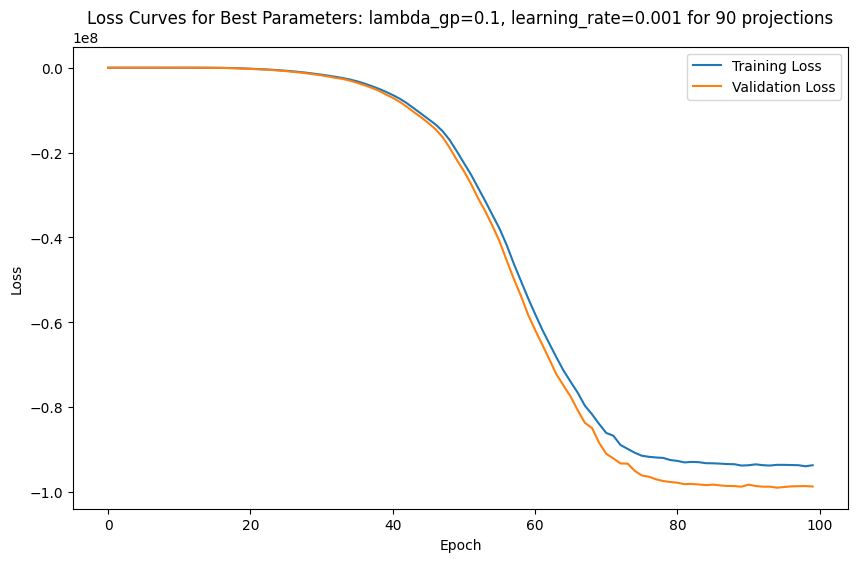

In [14]:
# Find the best parameters
best_params = min(results, key=results.get)
print(f'Best parameters: lambda_gp={best_params[0]}, learning_rate={best_params[1]} with loss: {results[best_params]:.4f}')

# Plot the loss curves for the best combination
plt.figure(figsize=(10, 6))
plt.plot(all_train_losses[best_params], label='Training Loss')
plt.plot(all_val_losses[best_params], label='Validation Loss')
plt.title(f'Loss Curves for Best Parameters 6 Convlayer Model: lambda_gp={best_params[0]}, learning_rate={best_params[1]} for 90 projections')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
# Convert the results dictionary to a DataFrame
results_df_1 = pd.DataFrame.from_dict(results, orient='index', columns=['Validation Loss'])
results_df_1.index = pd.MultiIndex.from_tuples(results_df_1.index, names=["lambda_gp", "learning_rate"])
results_df_1 = results_df_1.unstack(level=-1)  # To make 'learning_rate' columns and 'lambda_gp' rows

print(results_df_1)

              Validation Loss                                          
learning_rate          0.0001        0.0010        0.0100        0.1000
lambda_gp                                                              
0.1             -2.445211e+06 -9.898009e+07 -9.706265e+07 -9.605887e+07
0.5             -1.399718e+04 -1.994640e+07 -1.942658e+07 -1.931384e+07
1.0             -3.601910e+05 -9.768066e+06 -9.772730e+06 -9.536072e+06
2.0             -1.329127e+04 -6.727225e+05 -4.888662e+06 -4.866524e+06
5.0             -4.473942e+04 -1.974010e+06 -2.001136e+06 -1.977236e+06


In [18]:
# Print the model's parameters
print("Model parameters:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"Layer: {name} | Size: {param.size()} | Values: {param[:2]} \n")

# Print model architecture
print("Model architecture:")
print(model)

Model parameters:
Layer: layers.0.weight | Size: torch.Size([8, 1, 3, 3]) | Values: tensor([[[[ 0.3957,  0.2641,  0.1295],
          [ 0.0097, -0.3751, -0.3247],
          [ 0.3608, -0.1506, -0.3481]]],


        [[[ 0.0777, -0.1410, -0.1312],
          [-0.0297,  0.3384,  0.3010],
          [-0.1548,  0.1355, -0.1363]]]], device='cuda:0',
       grad_fn=<SliceBackward0>) 

Layer: layers.0.bias | Size: torch.Size([8]) | Values: tensor([-0.2540,  0.6299], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: layers.1.bias | Size: torch.Size([16]) | Values: tensor([-0.1490,  0.2496], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: layers.1.conv.weight | Size: torch.Size([16, 8, 3, 3]) | Values: tensor([[[[ 0.4028,  0.5138, -0.0599],
          [-0.0094,  0.4409,  0.4363],
          [-0.0997,  0.1762,  0.1549]],

         [[-0.0047, -0.1123, -0.0298],
          [-0.0360, -0.0085, -0.0480],
          [-0.0462,  0.0563, -0.0616]],

         [[ 0.1338, -0.0022,  0.1163],
          [-0.0098,

# Testing the model with new fbp reconstucted images and original images

In [17]:
# Load the model
model = ConvexRegularizer(num_layers=6)
model.load_state_dict(torch.load('/content/best_model_reg_lambda_0.1_lr_0.001.pth' ))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


<ipython-input-17-6fa0cc60babb>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/best_model_reg_lambda_0.1_lr_0.001.pth' ))


ConvexRegularizer(
  (layers): ModuleList(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): NonNegativeConvLayer(
      (conv): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): NonNegativeConvLayer(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): NonNegativeConvLayer(
      (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
  )
  (global_avg_pool): AdaptiveAvgPool2d(output_size=1)
)

Calculate regularizer output for original images and fbp reconstructed images

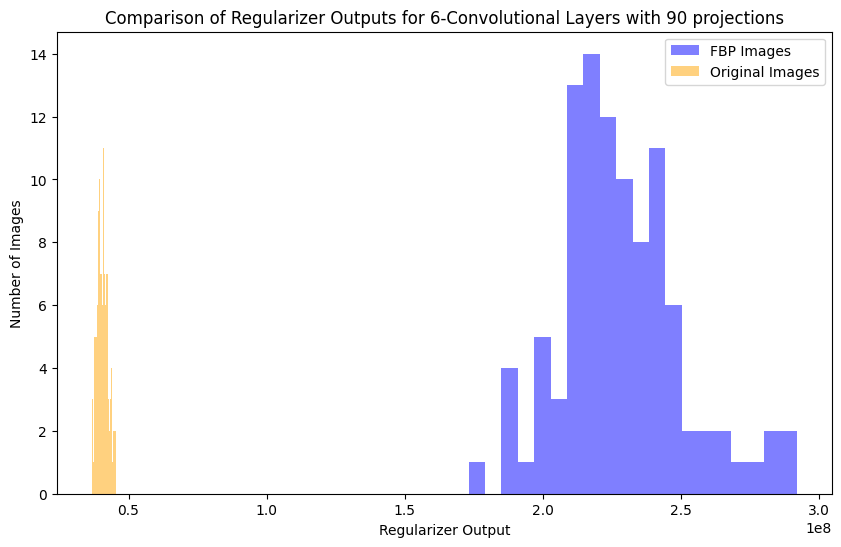

In [20]:
# Set the model to evaluation mode
model.eval()

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to mean 0, std 1 for single channel
])

# Function to load and preprocess the image
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = transform(image)  # Apply the transformations
    image = image.unsqueeze(0)  # Add a batch dimension
    return image

# Directory containing the images
fbp_images_dir = '/content/drive/My Drive/test_data/fbp_images'
original_images_dir = '/content/drive/My Drive/test_data/real_images'

# Get a list of all image paths in both directories
fbp_image_paths = [os.path.join(fbp_images_dir, img) for img in os.listdir(fbp_images_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]
original_image_paths = [os.path.join(original_images_dir, img) for img in os.listdir(original_images_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]

# Ensure we have the same number of original images as FBP images
original_image_paths = original_image_paths[:len(fbp_image_paths)]

# Collect the regularizer outputs for FBP and original images
fbp_outputs = []
original_outputs = []

with torch.no_grad():  # No need to compute gradients for inference
    for fbp_image_path in fbp_image_paths:
        # Process FBP image
        fbp_image = load_and_preprocess_image(fbp_image_path).to(device)
        fbp_output = model(fbp_image)
        fbp_outputs.append(fbp_output.item())  # Convert tensor to scalar and store

    for original_image_path in original_image_paths:
        # Process original image
        original_image = load_and_preprocess_image(original_image_path).to(device)
        original_output = model(original_image)
        original_outputs.append(original_output.item())  # Convert tensor to scalar and store

# Plotting the histograms
plt.figure(figsize=(10, 6))

# Histogram for FBP images
plt.hist(fbp_outputs, bins=20, alpha=0.5, label='FBP Images', color='blue')

# Histogram for Original images
plt.hist(original_outputs, bins=20, alpha=0.5, label='Original Images', color='orange')

# Adding titles and labels
plt.title('Comparison of Regularizer Outputs for 6-Convolutional Layers with 90 projections')
plt.xlabel('Regularizer Output')
plt.ylabel('Number of Images')
plt.legend(loc='upper right')

# Show the plot
plt.show()


In [21]:
# Convert the outputs to numpy arrays
fbp_outputs = np.array(fbp_outputs)
original_outputs = np.array(original_outputs)

# Calculate the mean and standard deviation for FBP images
fbp_mean = np.mean(fbp_outputs)
fbp_std = np.std(fbp_outputs)

# Calculate the mean and standard deviation for Original images
original_mean = np.mean(original_outputs)
original_std = np.std(original_outputs)

# Print the results
print(f'FBP Images - Mean: {fbp_mean:.4f}, Standard Deviation: {fbp_std:.4f}')
print(f'Original Images - Mean: {original_mean:.4f}, Standard Deviation: {original_std:.4f}')

FBP Images - Mean: 227868768.4800, Standard Deviation: 22088108.5717
Original Images - Mean: 40606399.5200, Standard Deviation: 1937234.1603


Comparing regularizer output for 3 layer model and 6 layer model 90 projection dataset

In [28]:
class ConvexRegularizer3(nn.Module):
    def __init__(self, num_layers=3):  # Set the number of layers to 3
        super(ConvexRegularizer3, self).__init__()
        self.layers = nn.ModuleList()

        in_channels = 1  # grayscale input image
        out_channels_list = [8, 16, 32]  # Adjust the channel sizes for 3 layers

        # Add alternating layers of Conv2d and NonNegativeConvLayer
        for i in range(num_layers):
            if i % 2 == 0:
                # Even index: Standard Conv2d layer
                self.layers.append(nn.Conv2d(in_channels, out_channels_list[i], kernel_size=3, stride=1, padding=1))
            else:
                # Odd index: NonNegativeConvLayer
                self.layers.append(NonNegativeConvLayer(in_channels, out_channels_list[i]))
            in_channels = out_channels_list[i]

        # Global average pooling layer to reduce the spatial dimensions to 1x1
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
            # Apply Leaky ReLU only for Conv2d layers here (since NonNegativeConvLayer already includes it)
            if isinstance(layer, nn.Conv2d):
                x = F.leaky_relu(x, negative_slope=0.01)
        x = self.global_avg_pool(x)  # Output shape: [batch_size, 32, 1, 1]
        x = x.view(x.size(0), -1)  # Flatten: [batch_size, 32]
        x = x.sum(dim=1, keepdim=True)  # Sum across channels: Output shape: [batch_size, 1]
        return x  # The final output is a scalar tensor of shape (batch_size, 1)



<ipython-input-35-b9006e21264e>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1.load_state_dict(torch.load('/content/best_model_reg_lambda_0.1_lr_0.1_3_conv_layer_90

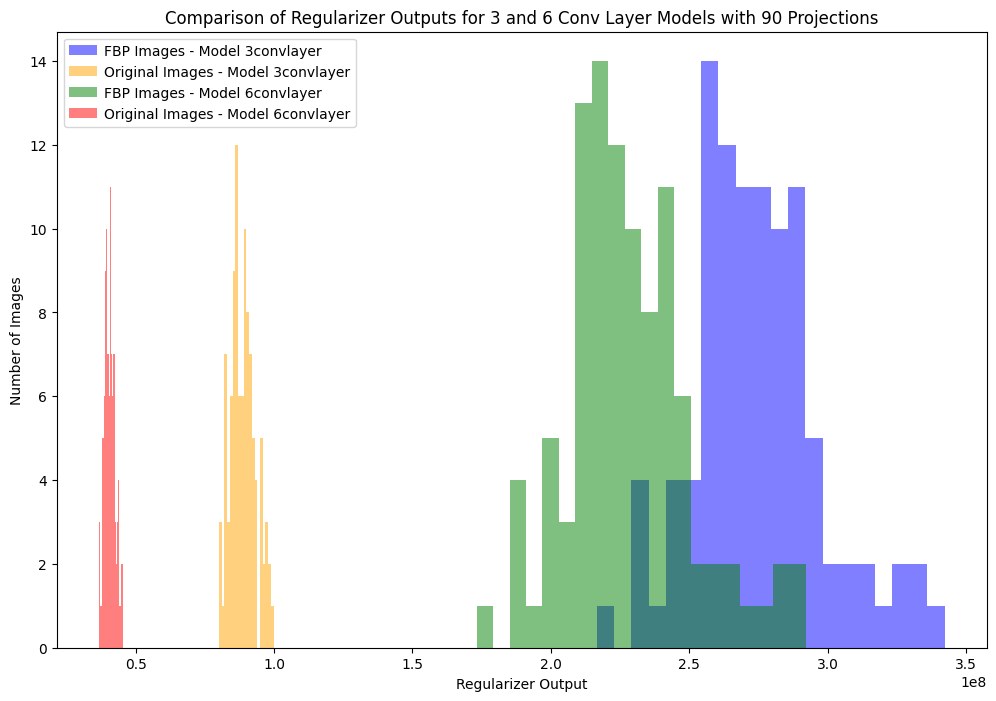

In [35]:
# Load the two models
model1 = ConvexRegularizer3(num_layers=3)  # 3-layer model
model2 = ConvexRegularizer(num_layers=6)  # 6-layer model

# Load the saved state_dict into these models
model1.load_state_dict(torch.load('/content/best_model_reg_lambda_0.1_lr_0.1_3_conv_layer_90_proj.pth'))
model2.load_state_dict(torch.load('/content/best_model_reg_lambda_0.1_lr_0.001.pth'))

# Move models to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model1.to(device)
model2.to(device)

# Function to load and preprocess the image
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = transform(image)  # Apply the transformations
    image = image.unsqueeze(0)  # Add a batch dimension
    return image

# Directory containing the images
fbp_images_dir = '/content/drive/My Drive/test_data/fbp_images'
original_images_dir = '/content/drive/My Drive/test_data/real_images'

# Get a list of all image paths in both directories
fbp_image_paths = [os.path.join(fbp_images_dir, img) for img in os.listdir(fbp_images_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]
original_image_paths = [os.path.join(original_images_dir, img) for img in os.listdir(original_images_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]

# Ensure we have the same number of original images as FBP images
original_image_paths = original_image_paths[:len(fbp_image_paths)]

# Collect the regularizer outputs for FBP and original images from both models
fbp_outputs_model1 = []
original_outputs_model1 = []

fbp_outputs_model2 = []
original_outputs_model2 = []

with torch.no_grad():  # No need to compute gradients for inference
    for fbp_image_path in fbp_image_paths:
        # Process FBP image
        fbp_image = load_and_preprocess_image(fbp_image_path).to(device)  # Move input to the correct device

        fbp_output_model1 = model1(fbp_image)
        fbp_outputs_model1.append(fbp_output_model1.item())  # Convert tensor to scalar and store

        fbp_output_model2 = model2(fbp_image)
        fbp_outputs_model2.append(fbp_output_model2.item())

  # Convert tensor to scalar and store

    for original_image_path in original_image_paths:
        # Process original image with both models
        original_image = load_and_preprocess_image(original_image_path).to(device)

        original_output_model1 = model1(original_image)
        original_outputs_model1.append(original_output_model1.item())  # Convert tensor to scalar and store

        original_output_model2 = model2(original_image)
        original_outputs_model2.append(original_output_model2.item())  # Convert tensor to scalar and store

# Plotting the histograms
plt.figure(figsize=(12, 8))

# Histogram for FBP images - Model 1
plt.hist(fbp_outputs_model1, bins=20, alpha=0.5, label='FBP Images - Model 3convlayer', color='blue')

# Histogram for Original images - Model 1
plt.hist(original_outputs_model1, bins=20, alpha=0.5, label='Original Images - Model 3convlayer', color='orange')

# Histogram for FBP images - Model 2
plt.hist(fbp_outputs_model2, bins=20, alpha=0.5, label='FBP Images - Model 6convlayer', color='green')

# Histogram for Original images - Model 2
plt.hist(original_outputs_model2, bins=20, alpha=0.5, label='Original Images - Model 6convlayer', color='red')

# Adding titles and labels
plt.title('Comparison of Regularizer Outputs for 3 and 6 Conv Layer Models with 90 Projections')
plt.xlabel('Regularizer Output')
plt.ylabel('Number of Images')
# Adjust the legend spacing and location
plt.legend(loc='best', handletextpad=0.5, borderaxespad=0.5)

# Show the plot
plt.show()


# **Gradient Descent Optimization**

In [36]:
# printing for analyzing nan and inf values
class VariationalLoss(Function):
    def __init__(self, least_squares, regularizer, alpha=0.01, rho0=1.0):
        super().__init__()
        self.least_squares = least_squares
        self.regularizer = regularizer
        self.alpha = alpha
        self.rho0 = rho0
        self.gradient_called = 0  # Initialize the gradient evaluation counter
        self.variational_losses = []  # List to store losses

    def __call__(self, x):
        # Data fidelity term: Least Squares ||y - A(x)||_Y^2
        fidelity_term = self.least_squares(x)
        #print(f"Fidelity Term: {fidelity_term}")
        if np.isnan(fidelity_term) or np.isinf(fidelity_term):
            raise ValueError("NaN or Inf detected in fidelity term")

        # Regularizer term: R(x)
        x_tensor = torch.tensor(x.as_array(), dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
        with torch.no_grad():
            reg_term = self.regularizer(x_tensor).detach().cpu().numpy().sum()
        #print(f"Regularizer Term: {reg_term}")
        if np.isnan(reg_term) or np.isinf(reg_term):
            raise ValueError("NaN or Inf detected in regularizer term")

        # L2 norm term: ||x||_X^2
        l2_norm_term = np.linalg.norm(x.as_array())**2
        #print(f"L2 Norm Term: {l2_norm_term}")
        if np.isnan(l2_norm_term) or np.isinf(l2_norm_term):
            raise ValueError("NaN or Inf detected in L2 norm term")

        # Variational Loss
        variational_loss = fidelity_term + self.alpha * (reg_term + self.rho0 * l2_norm_term)
        #print(f"Variational Loss: {variational_loss}")
        if np.isnan(variational_loss) or np.isinf(variational_loss):
            raise ValueError("NaN or Inf detected in variational loss")

        # Store the loss
        self.variational_losses.append(variational_loss)

        return variational_loss


    def gradient(self, x, out=None):
      self.gradient_called += 1  # Increment the gradient evaluation counter

      # Gradient of the data fidelity term
      fidelity_grad = self.least_squares.gradient(x).as_array()
      #print(f"Fidelity Gradient: {fidelity_grad}")
      if np.isnan(fidelity_grad).any() or np.isinf(fidelity_grad).any():
          raise ValueError("NaN or Inf detected in fidelity gradient")

      # Gradient of the regularizer term
      x_array = x.as_array()
      x_tensor = torch.tensor(x_array, dtype=torch.float32, requires_grad=True).unsqueeze(0).unsqueeze(0).to(device)

      # Retain gradients for x_tensor since it's a non-leaf tensor
      x_tensor.retain_grad()

      reg_term = self.regularizer(x_tensor)
      reg_term.backward(torch.ones_like(reg_term).to(device))

      reg_grad = x_tensor.grad.squeeze().cpu().numpy()  # Move to CPU before converting to NumPy
      #print(f"Regularizer Gradient: {reg_grad}")
      if np.isnan(reg_grad).any() or np.isinf(reg_grad).any():
          raise ValueError("NaN or Inf detected in regularizer gradient")

      # Gradient of the L2 norm term
      l2_norm_grad = 2 * x_array
      #print(f"L2 Norm Gradient: {l2_norm_grad}")
      if np.isnan(l2_norm_grad).any() or np.isinf(l2_norm_grad).any():
          raise ValueError("NaN or Inf detected in L2 norm gradient")

      # Total gradient
      total_grad = fidelity_grad + self.alpha * (reg_grad + self.rho0 * l2_norm_grad)
      #print(f"Total Gradient: {total_grad}")
      if np.isnan(total_grad).any() or np.isinf(total_grad).any():
          raise ValueError("NaN or Inf detected in total gradient")

      # Gradient Clipping
      total_grad = np.clip(total_grad, -1e5, 1e5)

      if out is not None:
          out.fill(total_grad)
          return out
      return DataContainer(total_grad)


 Using initial start of gradient descent as zero

In [23]:
# Set the parameters
panel_size = 128
num_projections = 90

# Define Image and Acquisition geometries
ig = ImageGeometry(voxel_num_x=panel_size, voxel_num_y=panel_size)  # Initialize image geometry with correct dimensions
angles = np.linspace(0, 180, num_projections, endpoint=False, dtype=np.float32)
ag = AcquisitionGeometry.create_Parallel2D()
ag.set_panel(panel_size)
ag.set_angles(angles)

# Define the projection operator A
A = ProjectionOperator(ig, ag)

# Hyper-parameter tuning of Gradient Descent Algorithm

In [24]:
# Define the ranges for each hyperparameter
alpha_range = [0.0001, 0.001]
rho0_range = [0.0001, 0.001]
step_size_range = [1e-06]
iterations_range = [ 1500, 2000, 2500]


In [37]:
# Define the path to your image folder (20 images used)
folder_path = '/content/drive/My Drive/dataset_for_optimization'

# Load all image paths from the folder
image_paths = [os.path.join(folder_path, fname) for fname in os.listdir(folder_path) if fname.endswith(('.png', '.jpg', '.jpeg'))]


# Initialize a list to store results
mse_results = []

# Early stopping parameters
threshold = 1e-6  # Stopping threshold for loss change
patience = 10  # Number of iterations to wait before stopping if convergence is detected

# Iterate over each combination of hyperparameters
for alpha, rho0, step_size, num_iterations in itertools.product(alpha_range, rho0_range, step_size_range, iterations_range):
    print(f"Testing alpha={alpha}, rho0={rho0}, step_size={step_size}, iterations={num_iterations}")

    image_results = []

    for image_path in image_paths:
        print(f"Processing {image_path}")

        # Process the image to generate the sinogram and FBP reconstruction
        image_data, noisy_sino, fbp_recon = process_image(image_path, num_projections, panel_size, mean=0, var=0.5)

        # Define the target sinogram (from the generated one)
        target_sinogram = AcquisitionData(noisy_sino.as_array().astype(np.float32), geometry=ag)

        # Define the Least Squares function
        least_squares = LeastSquares(A, target_sinogram)

        # Initialize the objective function with the current hyperparameters
        objective_function = VariationalLoss(least_squares, model, alpha=alpha, rho0=rho0)

        # Initialize the GD algorithm
        initial_image = np.zeros((panel_size, panel_size), dtype=np.float32)
        initial_point = ImageData(initial_image, geometry=ig)
        gd = GD(initial=initial_point, objective_function=objective_function, step_size=step_size)

        # Set up the GD algorithm
        gd.set_up(initial=initial_point, objective_function=objective_function, step_size=step_size)

        # Initialize early stopping criteria variables
        previous_loss = float('inf')
        patience_counter = 0

        # Run the GD algorithm with early stopping
        for i in range(num_iterations):
            # Perform an iteration of the GD algorithm
            gd.update()

            # Get the current loss (objective value)
            current_loss = objective_function(gd.get_output())

            # Early stopping based on loss change
            if abs(previous_loss - current_loss) < threshold:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f"Stopping early after {i+1} iterations due to minimal loss change.")
                    break
            else:
                patience_counter = 0  # Reset patience if the change is significant

            previous_loss = current_loss

        # Get the result and final loss after the optimization run
        final_loss = gd.get_last_loss()  # loss is stored in the objective_function

        # Compute the reconstruction and MSE
        reconstruction = gd.get_output().as_array()
        mse = mean_squared_error(image_data.as_array().flatten(), reconstruction.flatten())

        # Store the MSE for this image and hyperparameters
        image_results.append(mse)

    # Compute the average MSE across all images for the current hyperparameters
    avg_mse = sum(image_results) / len(image_results)

    # Store the results
    mse_results.append({
        'alpha': alpha,
        'rho0': rho0,
        'step_size': step_size,
        'iterations': num_iterations,
        'average_mse': avg_mse
    })

    print(f"Average MSE for alpha={alpha}, rho0={rho0}, step_size={step_size}, iterations={num_iterations}: {avg_mse}\n")

# After testing all combinations, find the best one
best_result = min(mse_results, key=lambda x: x['average_mse'])
print(f"Best parameters: alpha={best_result['alpha']}, rho0={best_result['rho0']}, step_size={best_result['step_size']}, iterations={best_result['iterations']}, with average MSE: {best_result['average_mse']}")



Testing alpha=0.0001, rho0=0.0001, step_size=1e-06, iterations=1500
Processing /content/drive/My Drive/dataset_for_optimization/ellipse_1.png
Processing /content/drive/My Drive/dataset_for_optimization/ellipse_2.png
Processing /content/drive/My Drive/dataset_for_optimization/ellipse_3.png
Processing /content/drive/My Drive/dataset_for_optimization/ellipse_4.png
Processing /content/drive/My Drive/dataset_for_optimization/ellipse_5.png
Processing /content/drive/My Drive/dataset_for_optimization/ellipse_6.png
Processing /content/drive/My Drive/dataset_for_optimization/ellipse_7.png
Processing /content/drive/My Drive/dataset_for_optimization/ellipse_8.png
Processing /content/drive/My Drive/dataset_for_optimization/ellipse_9.png
Processing /content/drive/My Drive/dataset_for_optimization/ellipse_10.png
Processing /content/drive/My Drive/dataset_for_optimization/ellipse_11.png
Processing /content/drive/My Drive/dataset_for_optimization/ellipse_12.png
Processing /content/drive/My Drive/datase

In [38]:
for result in mse_results:
    print(f"alpha={result['alpha']}, rho0={result['rho0']}, step_size={result['step_size']}, iterations={result['iterations']}, average MSE={result['average_mse']}")


alpha=0.0001, rho0=0.0001, step_size=1e-06, iterations=1500, average MSE=0.0025660290120868012
alpha=0.0001, rho0=0.0001, step_size=1e-06, iterations=2000, average MSE=0.002181972443941049
alpha=0.0001, rho0=0.0001, step_size=1e-06, iterations=2500, average MSE=0.001915871401433833
alpha=0.0001, rho0=0.001, step_size=1e-06, iterations=1500, average MSE=0.002568686255835928
alpha=0.0001, rho0=0.001, step_size=1e-06, iterations=2000, average MSE=0.002177656692219898
alpha=0.0001, rho0=0.001, step_size=1e-06, iterations=2500, average MSE=0.001907444727839902
alpha=0.001, rho0=0.0001, step_size=1e-06, iterations=1500, average MSE=0.002596719449502416
alpha=0.001, rho0=0.0001, step_size=1e-06, iterations=2000, average MSE=0.0022128931392217054
alpha=0.001, rho0=0.0001, step_size=1e-06, iterations=2500, average MSE=0.0019452276697847991
alpha=0.001, rho0=0.001, step_size=1e-06, iterations=1500, average MSE=0.0025931900658179075
alpha=0.001, rho0=0.001, step_size=1e-06, iterations=2000, avera

Processing /content/drive/My Drive/dataset_for_optimization/ellipse_1.png with the best parameters


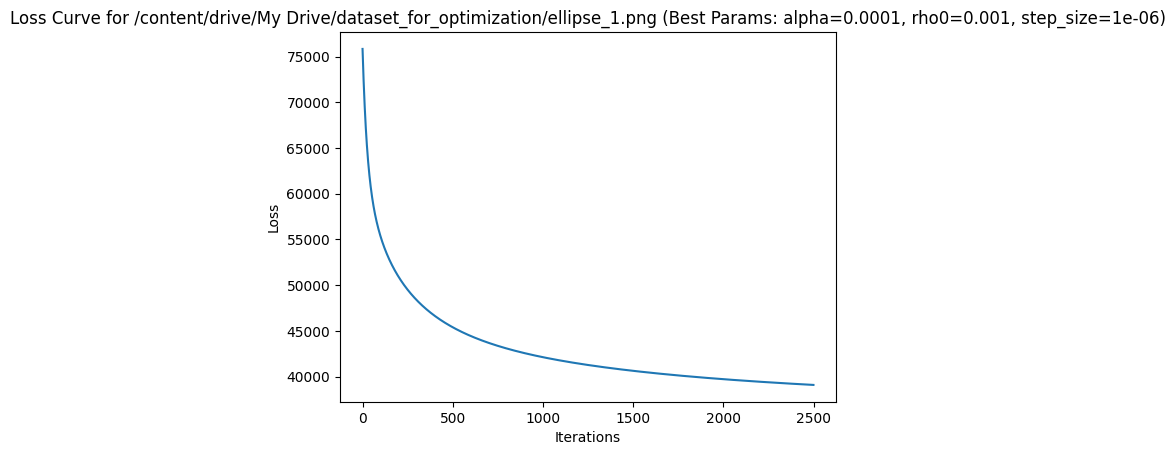

Processing /content/drive/My Drive/dataset_for_optimization/ellipse_2.png with the best parameters


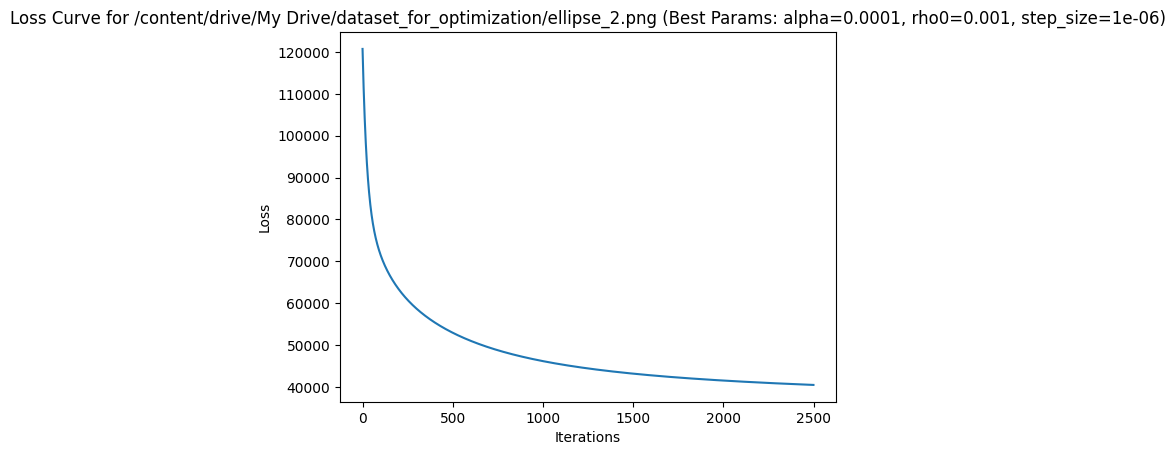

Processing /content/drive/My Drive/dataset_for_optimization/ellipse_3.png with the best parameters


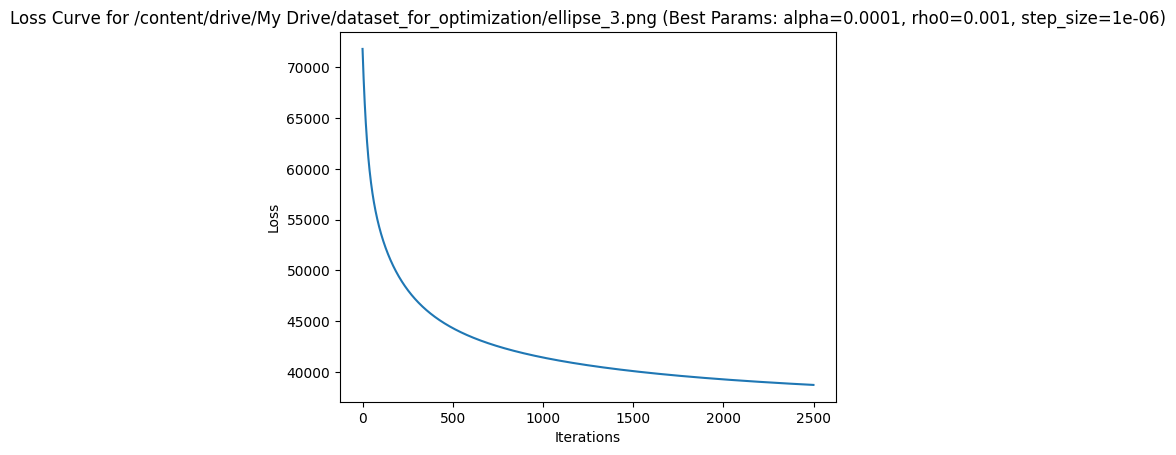

Processing /content/drive/My Drive/dataset_for_optimization/ellipse_4.png with the best parameters


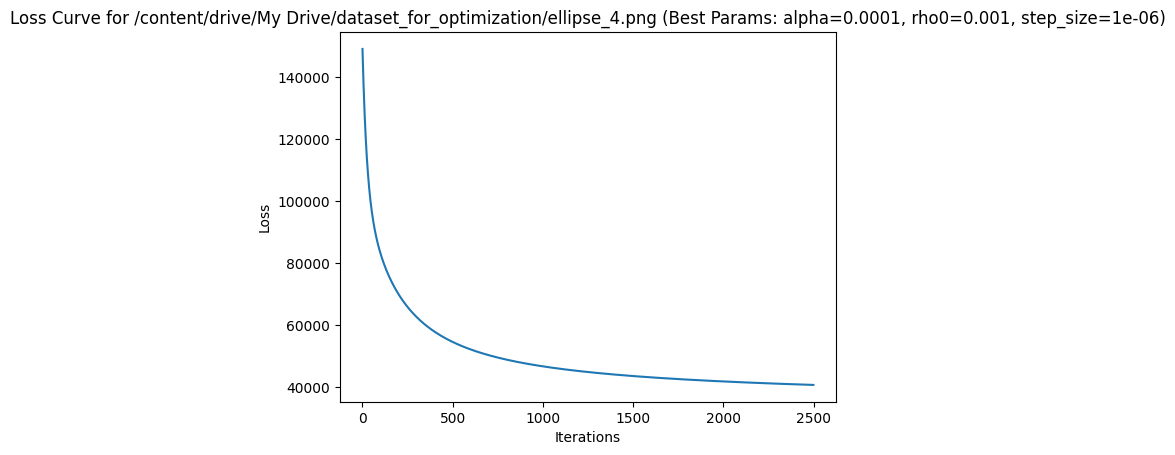

Processing /content/drive/My Drive/dataset_for_optimization/ellipse_5.png with the best parameters


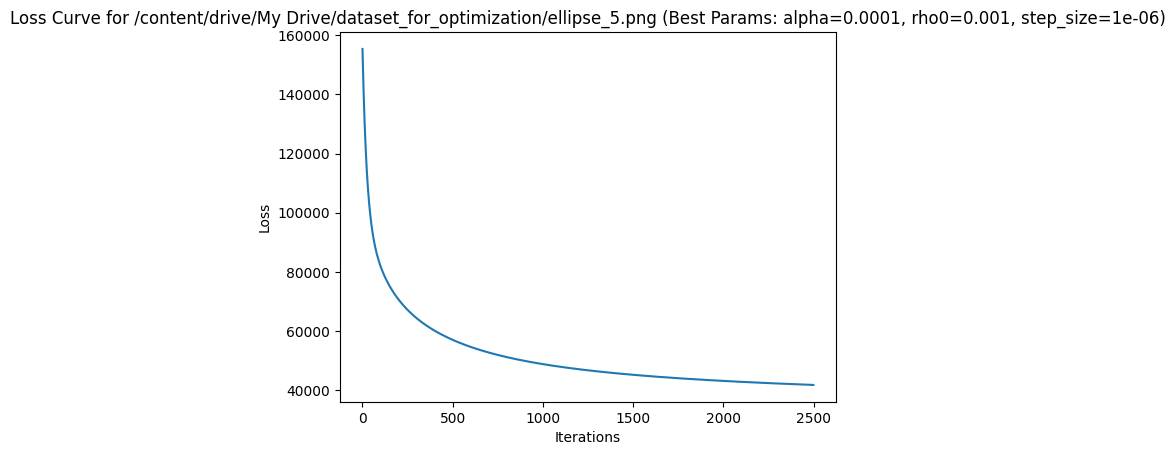

Processing /content/drive/My Drive/dataset_for_optimization/ellipse_6.png with the best parameters


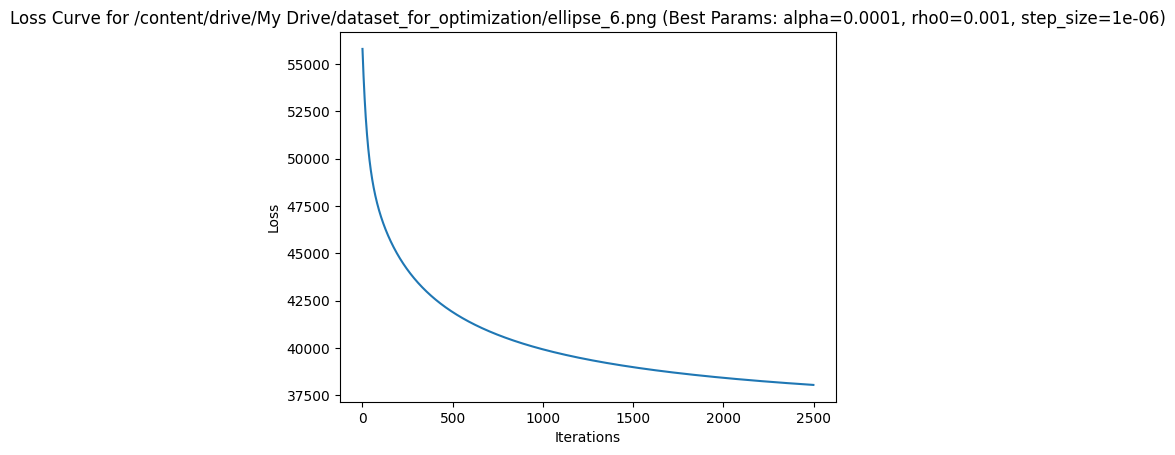

Processing /content/drive/My Drive/dataset_for_optimization/ellipse_7.png with the best parameters


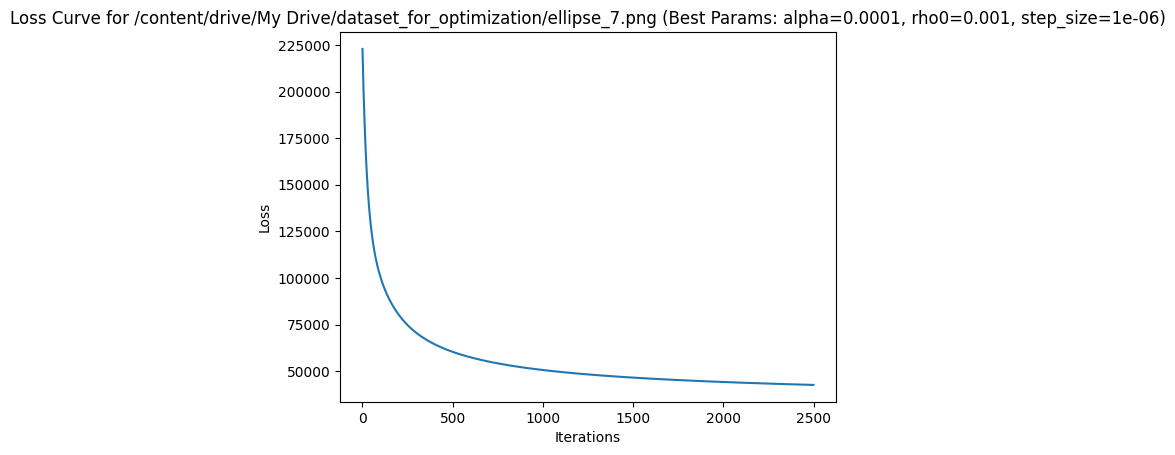

Processing /content/drive/My Drive/dataset_for_optimization/ellipse_8.png with the best parameters


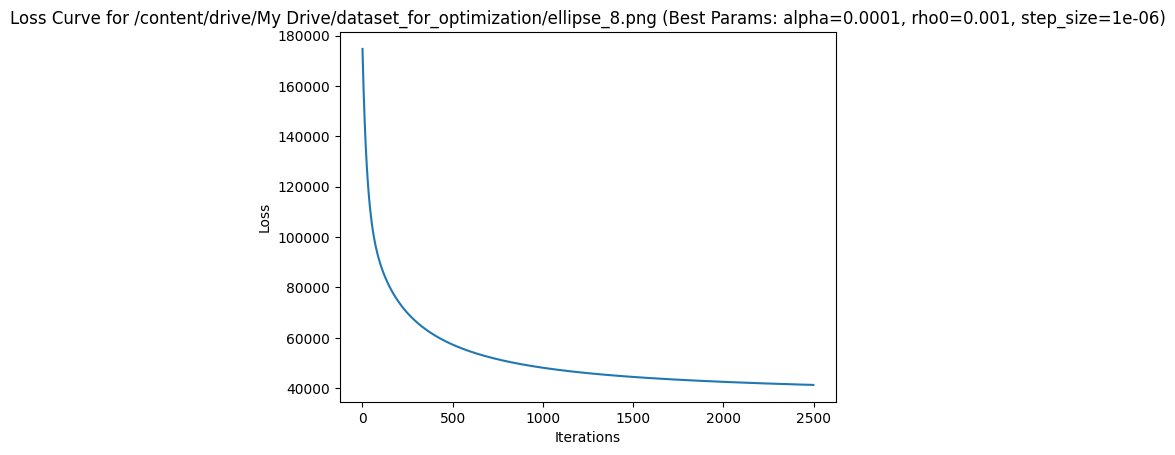

Processing /content/drive/My Drive/dataset_for_optimization/ellipse_9.png with the best parameters


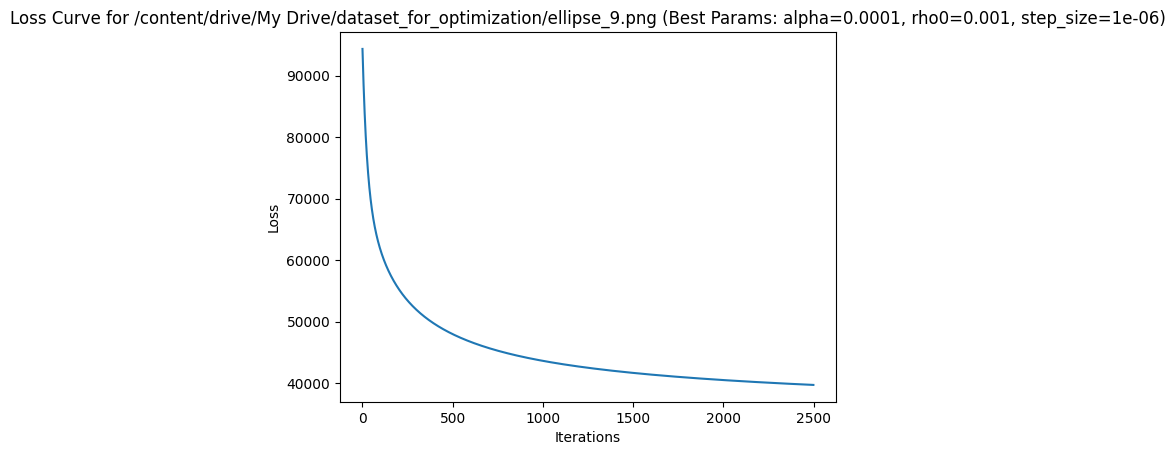

Processing /content/drive/My Drive/dataset_for_optimization/ellipse_10.png with the best parameters


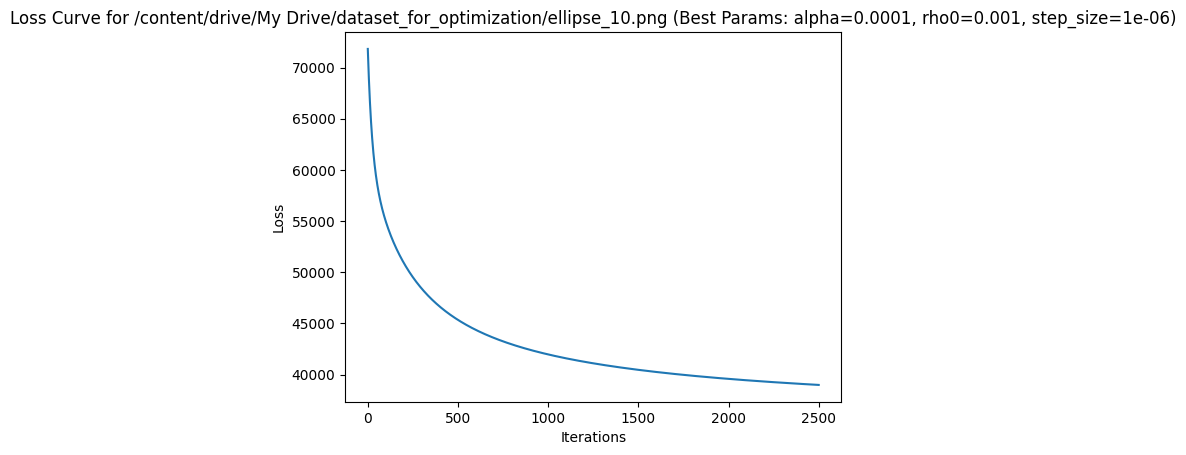

Processing /content/drive/My Drive/dataset_for_optimization/ellipse_11.png with the best parameters


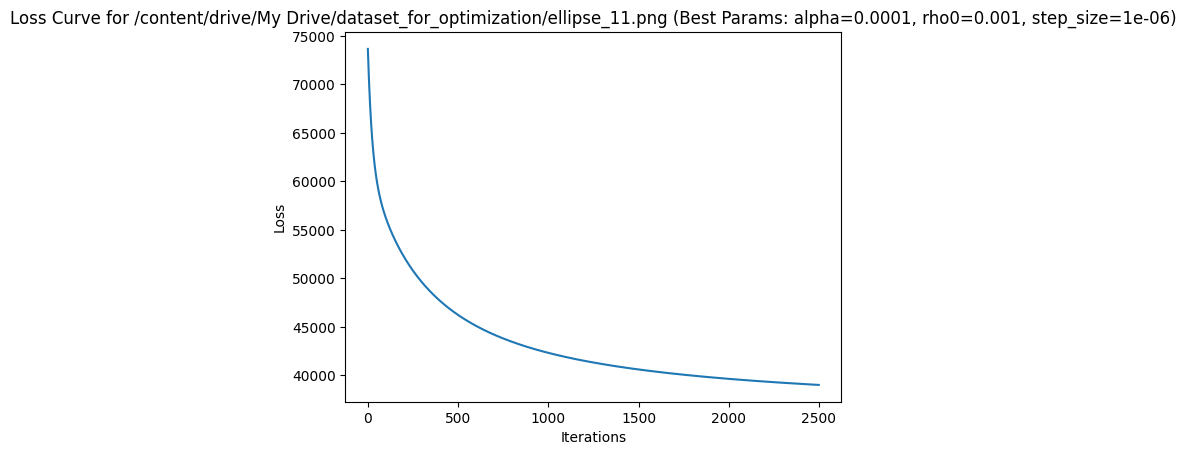

Processing /content/drive/My Drive/dataset_for_optimization/ellipse_12.png with the best parameters


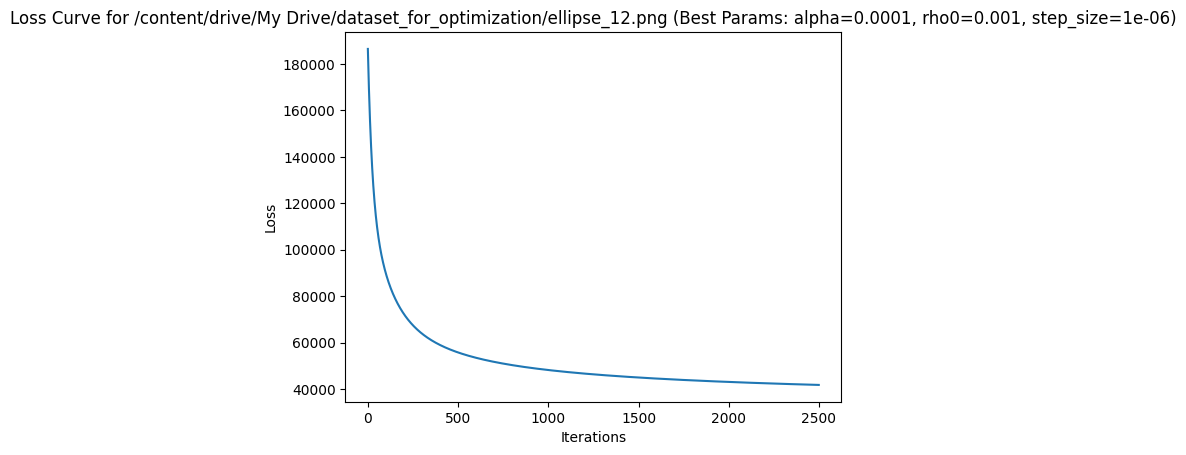

Processing /content/drive/My Drive/dataset_for_optimization/ellipse_13.png with the best parameters


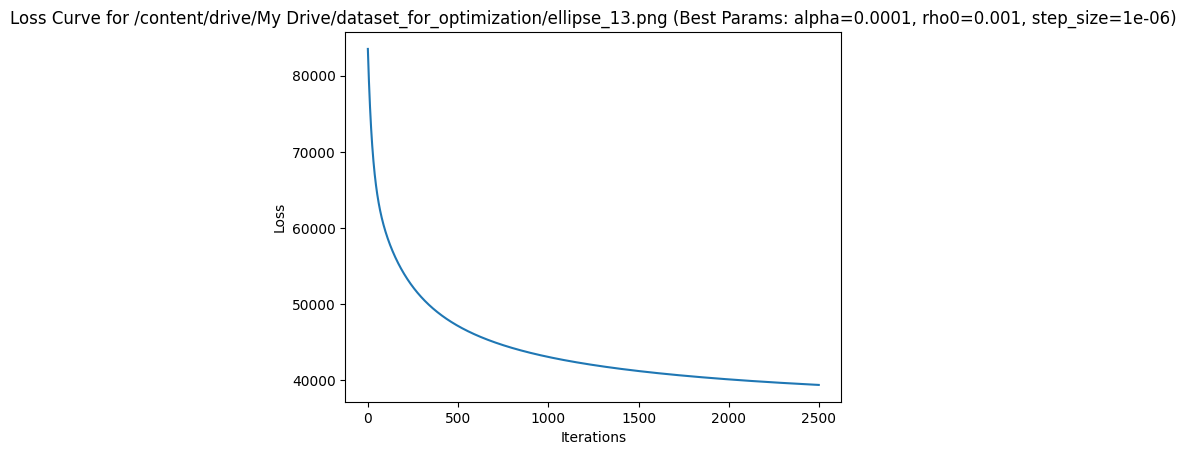

Processing /content/drive/My Drive/dataset_for_optimization/ellipse_14.png with the best parameters


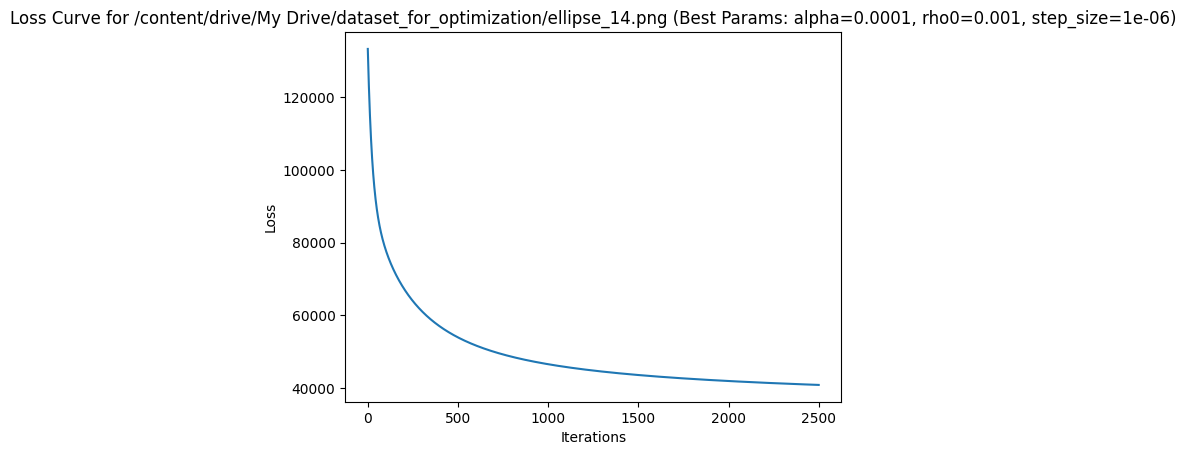

Processing /content/drive/My Drive/dataset_for_optimization/ellipse_15.png with the best parameters


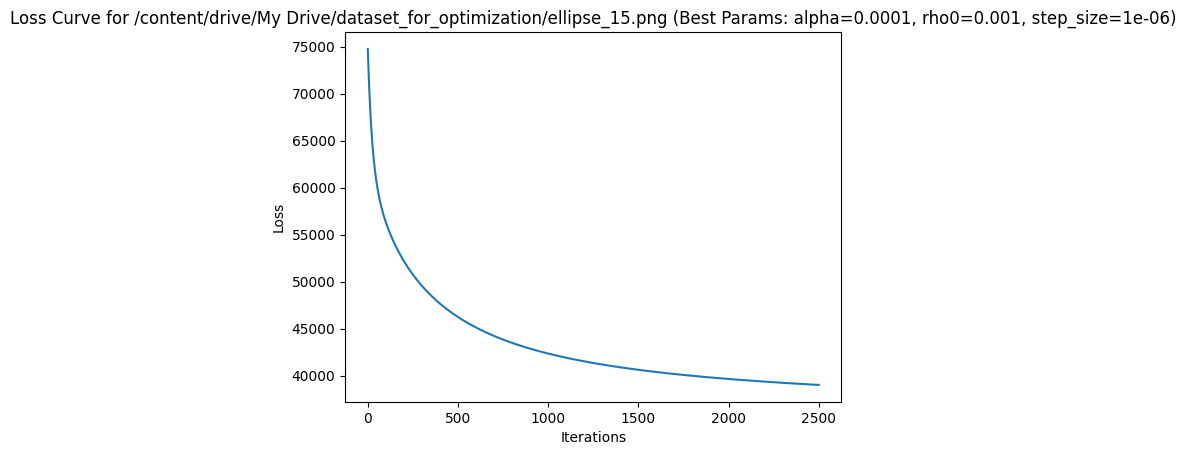

Processing /content/drive/My Drive/dataset_for_optimization/ellipse_16.png with the best parameters


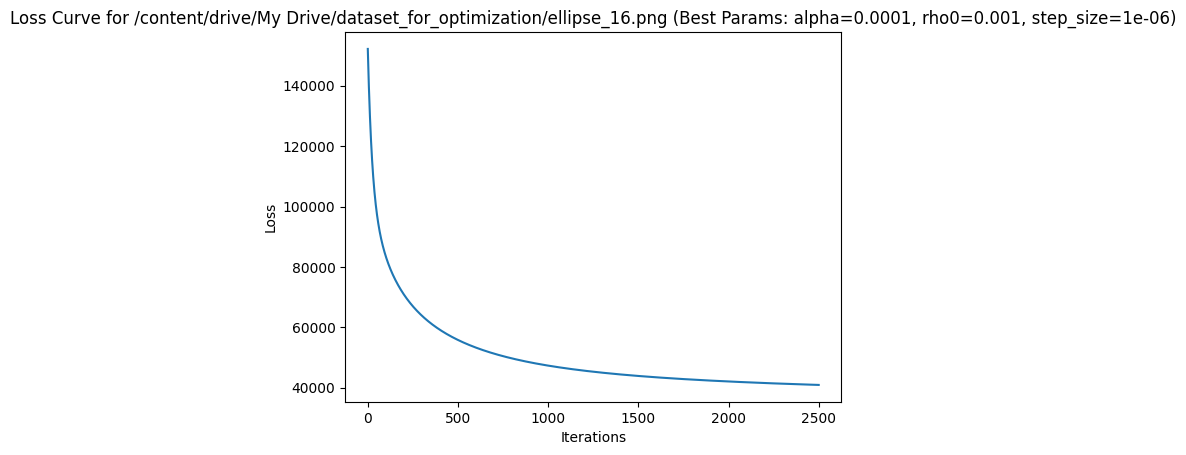

Processing /content/drive/My Drive/dataset_for_optimization/ellipse_17.png with the best parameters


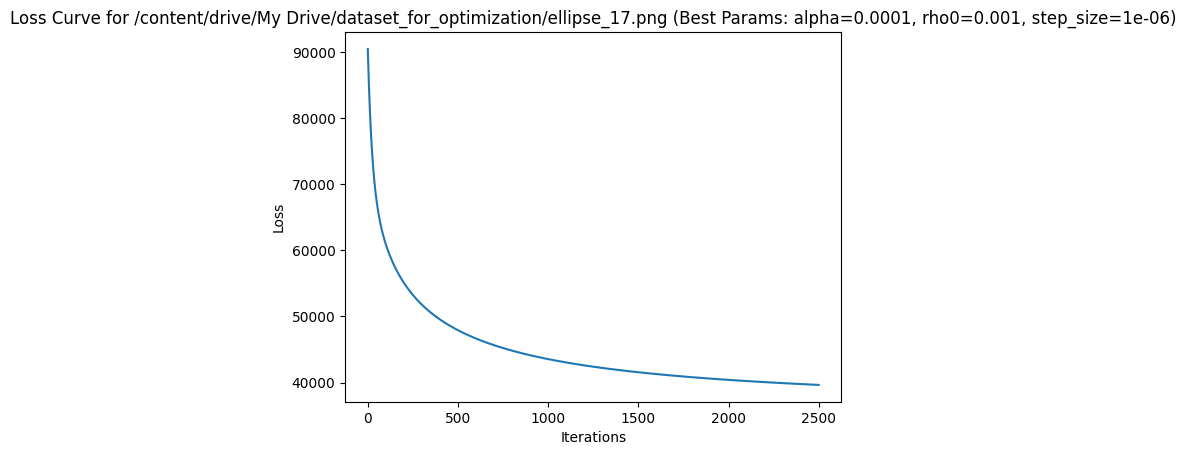

Processing /content/drive/My Drive/dataset_for_optimization/ellipse_18.png with the best parameters


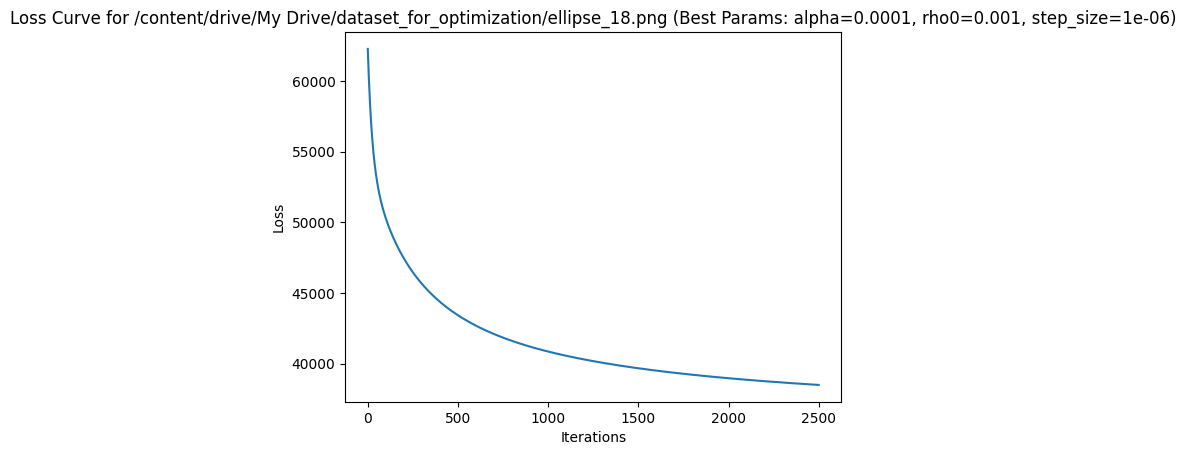

Processing /content/drive/My Drive/dataset_for_optimization/ellipse_19.png with the best parameters


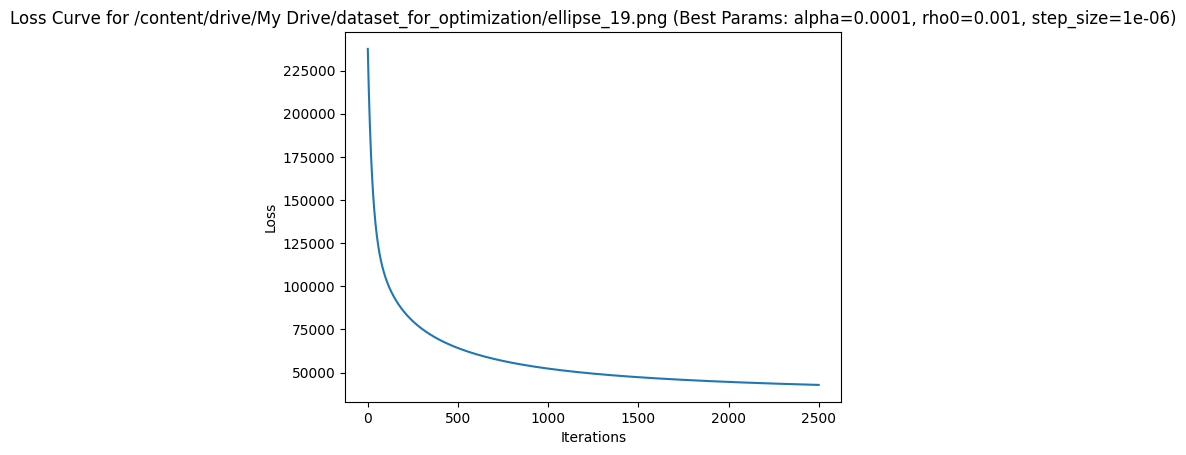

Processing /content/drive/My Drive/dataset_for_optimization/ellipse_20.png with the best parameters


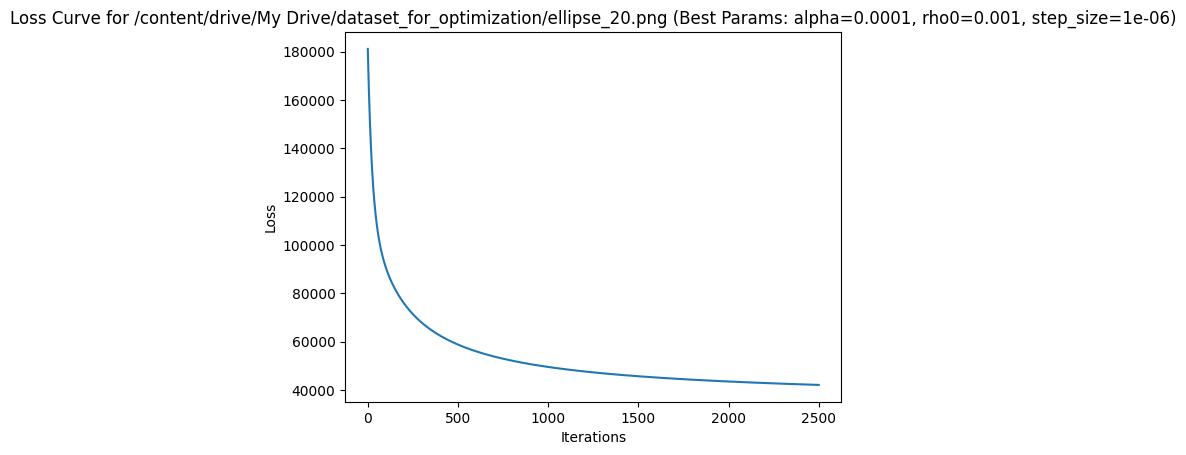

In [39]:
# Now compute the loss curve for the best parameters
alpha = 0.0001
rho0 = 0.001
step_size = 1e-06
num_iterations = 2500

# Initialize a list to store the loss values for plotting
loss_values = []

# Define the path to your image folder (20 images used)
folder_path = '/content/drive/My Drive/dataset_for_optimization'

# Load all image paths from the folder
image_paths = [os.path.join(folder_path, fname) for fname in os.listdir(folder_path) if fname.endswith(('.png', '.jpg', '.jpeg'))]

# Iterate over each image to compute the loss curve with the best parameters
for image_path in image_paths:
    print(f"Processing {image_path} with the best parameters")

    # Process the image to generate the sinogram and FBP reconstruction
    image_data, noisy_sino, fbp_recon = process_image(image_path, num_projections, panel_size, mean=0, var=0.5)

    # Define the target sinogram (from the generated one)
    target_sinogram = AcquisitionData(noisy_sino.as_array().astype(np.float32), geometry=ag)

    # Define the Least Squares function
    least_squares = LeastSquares(A, target_sinogram)

    # Initialize the objective function with the best hyperparameters
    objective_function = VariationalLoss(least_squares, model, alpha=alpha, rho0=rho0)

    # Initialize the GD algorithm
    initial_image = np.zeros((panel_size, panel_size), dtype=np.float32)
    initial_point = ImageData(initial_image, geometry=ig)
    gd = GD(initial=initial_point, objective_function=objective_function, step_size=step_size)

    # Set up the GD algorithm
    gd.set_up(initial=initial_point, objective_function=objective_function, step_size=step_size)

    # Run the GD algorithm to compute the loss curve
    for i in range(num_iterations):
        # Perform an iteration of the GD algorithm
        gd.update()

        # Get the current loss (objective value)
        current_loss = objective_function(gd.get_output())
        loss_values.append(current_loss)  # Store the loss value

    # Plot the loss curve for this specific image
    plt.plot(loss_values)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Loss Curve for {image_path} (Best Params: alpha={alpha}, rho0={rho0}, step_size={step_size})')
    plt.show()

    # Clear the loss values for the next image
    loss_values.clear()

# Using optimal parameters on unseen images

In [40]:
# Optimal parameters found during tuning
best_alpha = 0.0001
best_rho0 = 0.001
best_step_size = 0.000001
best_iterations = 2500

In [41]:
# Define the path to your folder containing unseen images
unseen_folder_path = '/content/drive/My Drive/dataset_for_testing_GD'

# Load all image paths from the folder
unseen_image_paths = [os.path.join(unseen_folder_path, fname) for fname in os.listdir(unseen_folder_path) if fname.endswith(('.png', '.jpg', '.jpeg'))]

Processing /content/drive/My Drive/dataset_for_testing_GD/ellipse_1.png


  0%|          | 0/2500 [00:00<?, ?it/s]

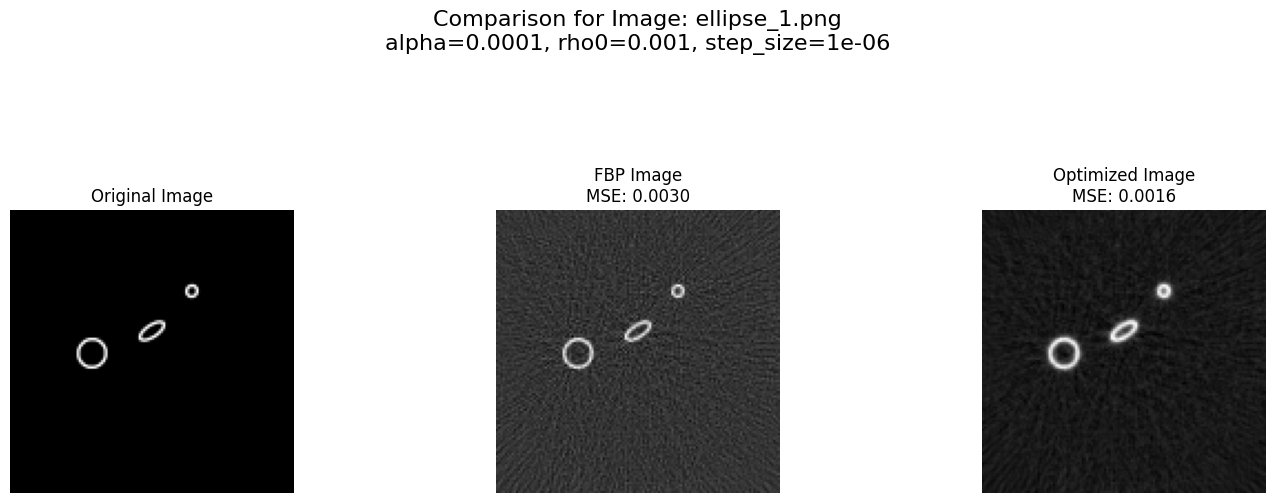

Processing /content/drive/My Drive/dataset_for_testing_GD/ellipse_2.png


  0%|          | 0/2500 [00:00<?, ?it/s]

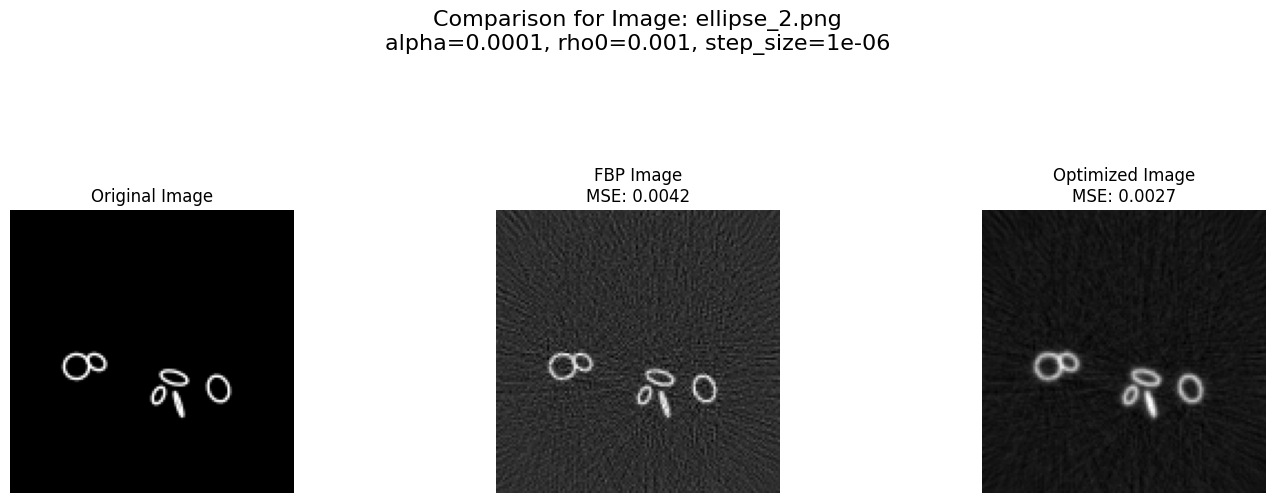

Processing /content/drive/My Drive/dataset_for_testing_GD/ellipse_3.png


  0%|          | 0/2500 [00:00<?, ?it/s]

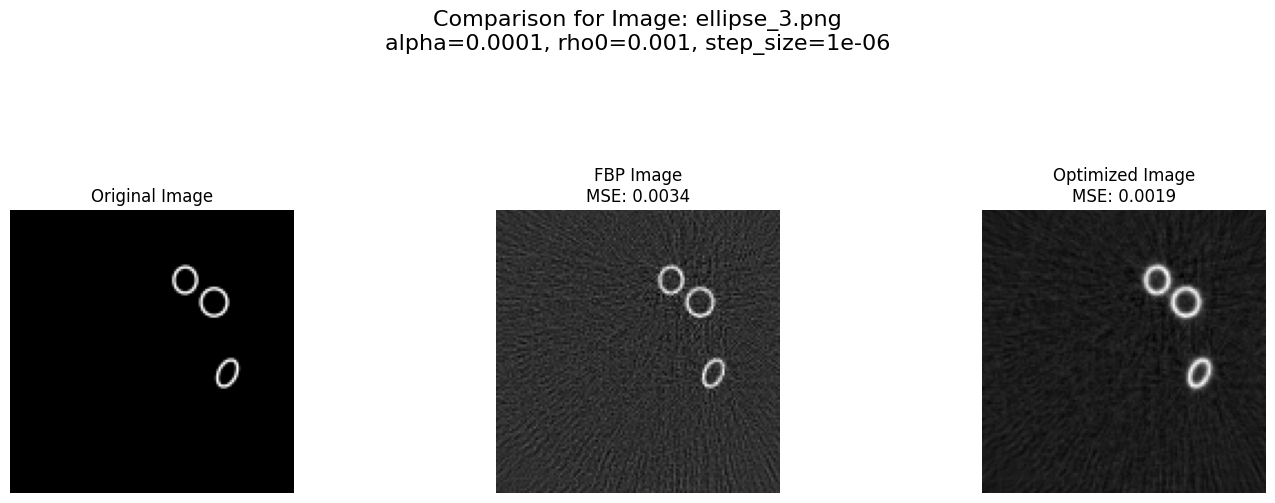

Processing /content/drive/My Drive/dataset_for_testing_GD/ellipse_4.png


  0%|          | 0/2500 [00:00<?, ?it/s]

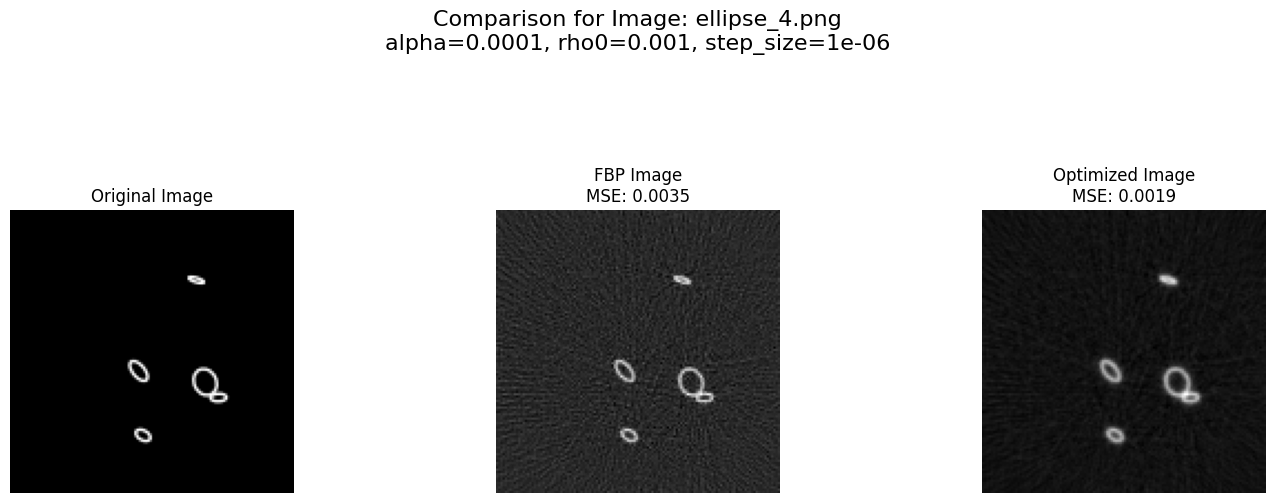

Processing /content/drive/My Drive/dataset_for_testing_GD/ellipse_5.png


  0%|          | 0/2500 [00:00<?, ?it/s]

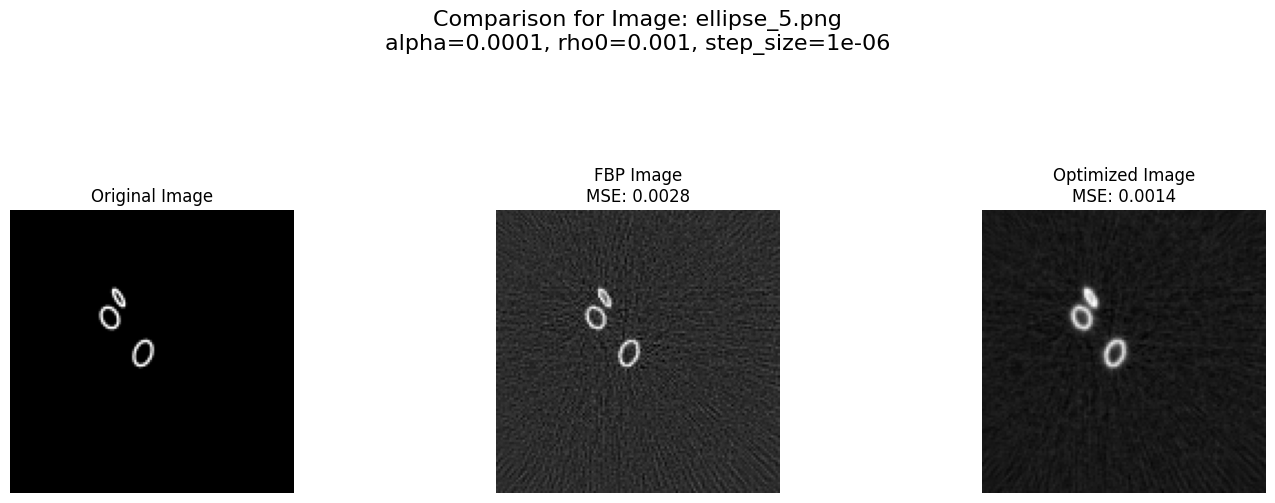

Processing /content/drive/My Drive/dataset_for_testing_GD/ellipse_6.png


  0%|          | 0/2500 [00:00<?, ?it/s]

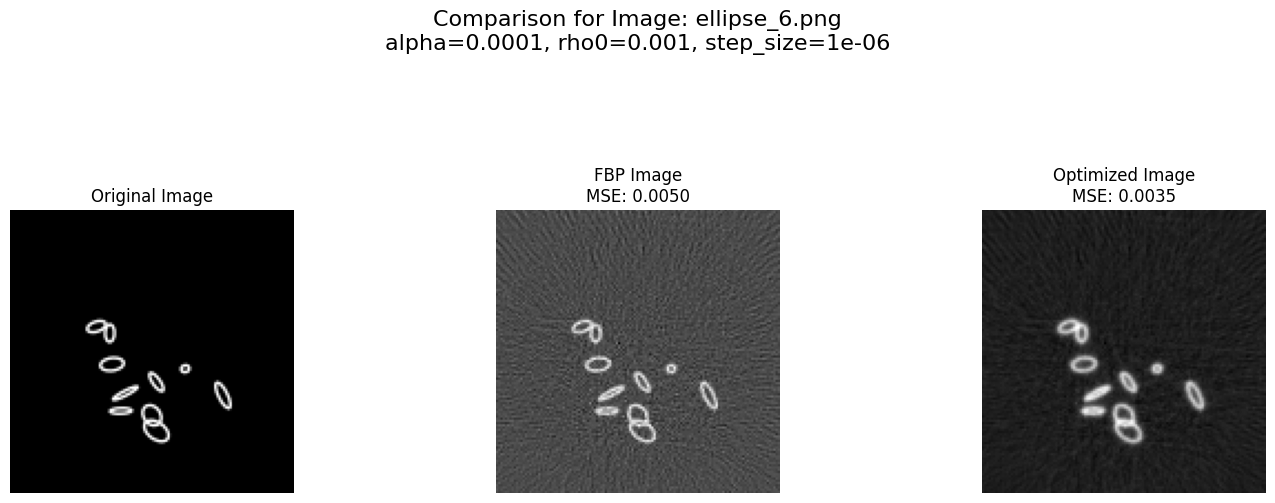

Processing /content/drive/My Drive/dataset_for_testing_GD/ellipse_7.png


  0%|          | 0/2500 [00:00<?, ?it/s]

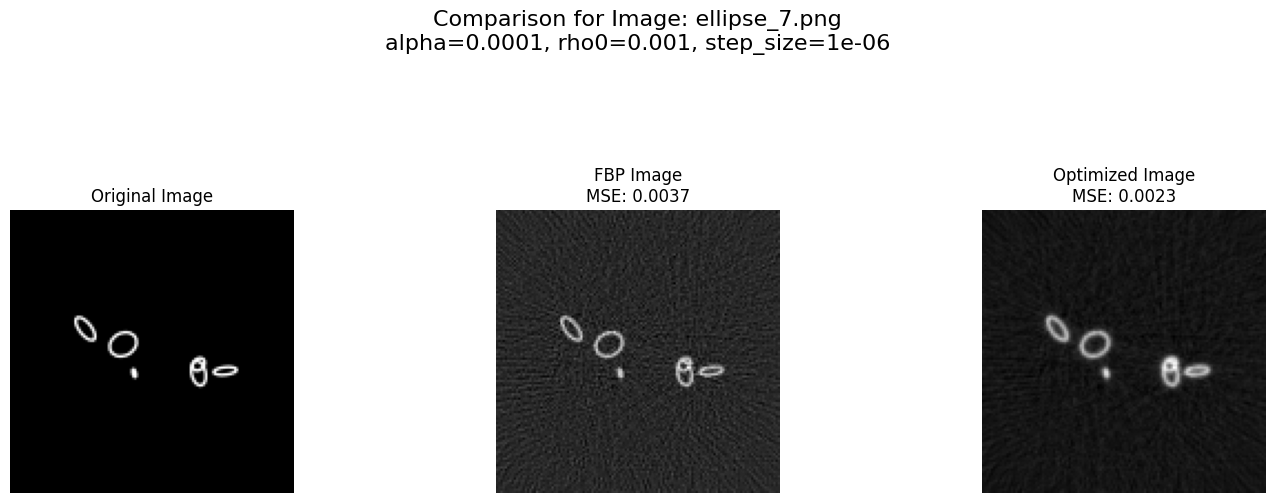

Processing /content/drive/My Drive/dataset_for_testing_GD/ellipse_8.png


  0%|          | 0/2500 [00:00<?, ?it/s]

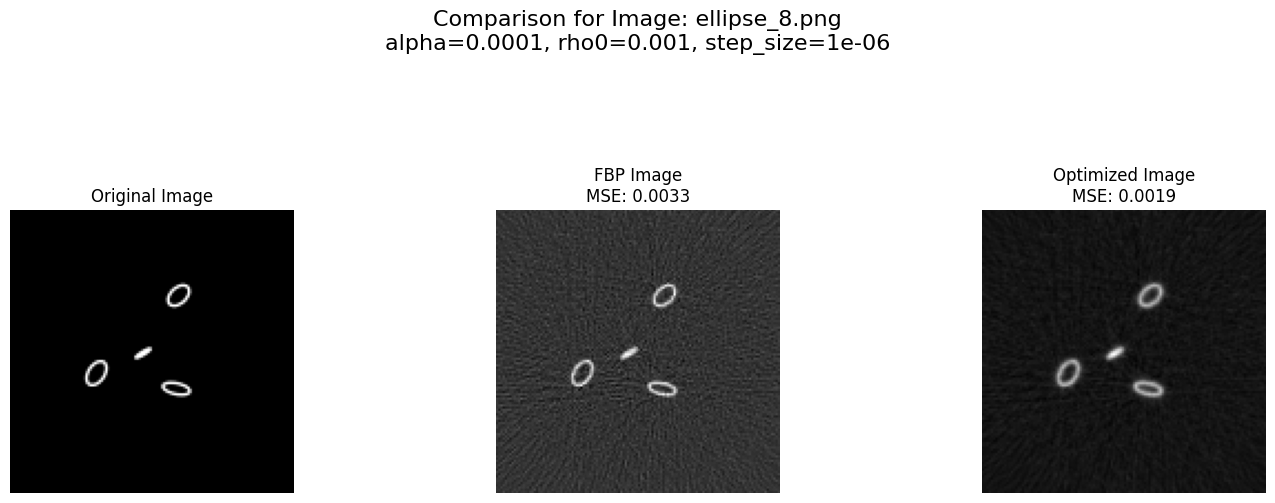

Processing /content/drive/My Drive/dataset_for_testing_GD/ellipse_9.png


  0%|          | 0/2500 [00:00<?, ?it/s]

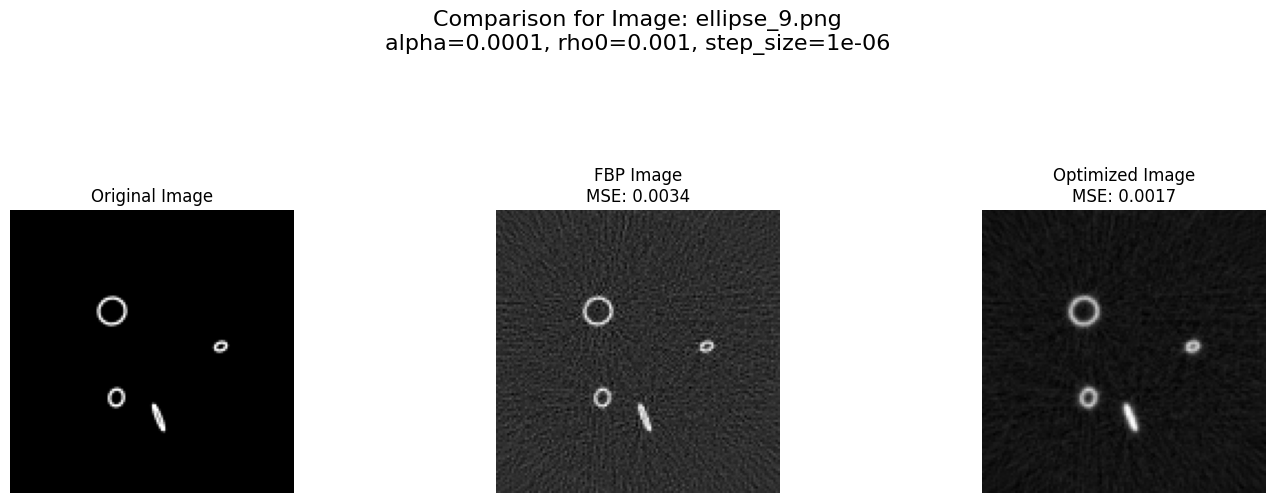

Processing /content/drive/My Drive/dataset_for_testing_GD/ellipse_10.png


  0%|          | 0/2500 [00:00<?, ?it/s]

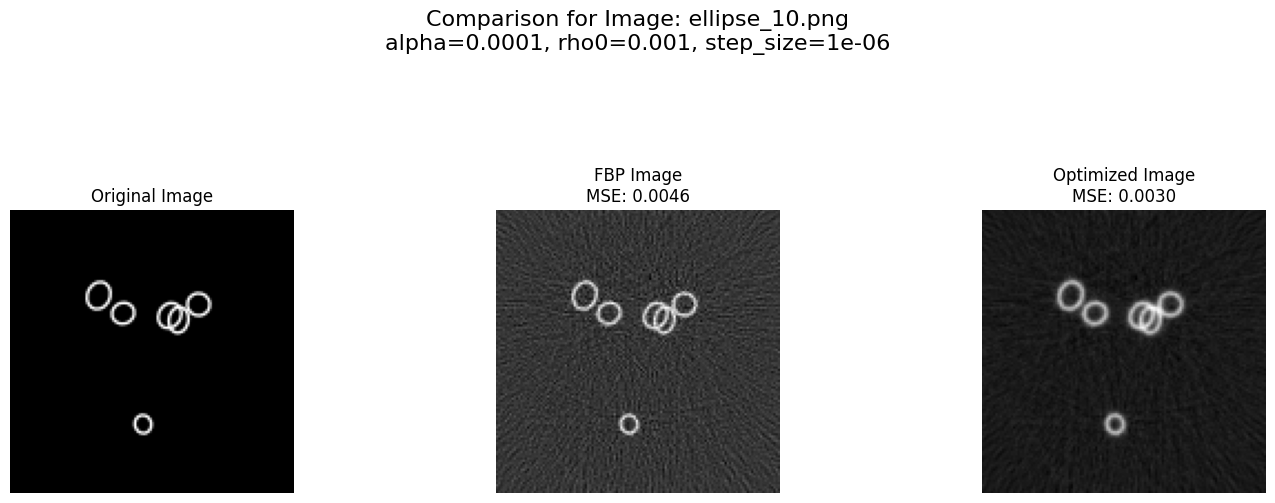

  adding: content/output_images/ (stored 0%)
  adding: content/output_images/model_6_lyr_90_proj_0.0001_0.001_zero_initial/ (stored 0%)
  adding: content/output_images/model_6_lyr_90_proj_0.0001_0.001_zero_initial/comparison_ellipse_3.svg (deflated 30%)
  adding: content/output_images/model_6_lyr_90_proj_0.0001_0.001_zero_initial/comparison_ellipse_4.svg (deflated 30%)
  adding: content/output_images/model_6_lyr_90_proj_0.0001_0.001_zero_initial/comparison_ellipse_6.svg (deflated 29%)
  adding: content/output_images/model_6_lyr_90_proj_0.0001_0.001_zero_initial/comparison_ellipse_5.svg (deflated 30%)
  adding: content/output_images/model_6_lyr_90_proj_0.0001_0.001_zero_initial/comparison_ellipse_9.svg (deflated 30%)
  adding: content/output_images/model_6_lyr_90_proj_0.0001_0.001_zero_initial/comparison_ellipse_1.svg (deflated 30%)
  adding: content/output_images/model_6_lyr_90_proj_0.0001_0.001_zero_initial/comparison_ellipse_8.svg (deflated 30%)
  adding: content/output_images/model_

In [42]:
# Create a directory to save the results in the Colab file system
output_dir = '/content/output_images/model_6_lyr_90_proj_0.0001_0.001_zero_initial'
os.makedirs(output_dir, exist_ok=True)

# Iterate over each unseen image
for image_path in unseen_image_paths:
    print(f"Processing {image_path}")

    # Process the image to generate the sinogram and FBP reconstruction
    image_data, noisy_sino, fbp_recon = process_image(image_path, num_projections, panel_size, mean=0, var=0.5)

    # Ensure image_data is float32
    image_data = ImageData(image_data.as_array().astype(np.float32), geometry=ig)

    # Define the target sinogram (from the generated one)
    target_sinogram = AcquisitionData(noisy_sino.as_array().astype(np.float32), geometry=ag)  # Use AcquisitionData for sinogram

    # Define the Least Squares function
    least_squares = LeastSquares(A, target_sinogram)

    # Initialize the objective function with the best hyperparameters
    objective_function = VariationalLoss(least_squares, model, alpha=best_alpha, rho0=best_rho0)

    # Initialize a zero image of the same shape as the target image, ensuring it is float32
    initial_image = np.zeros((panel_size, panel_size), dtype=np.float32)

    # Create an ImageData object with the correct geometry and float32 type
    initial_point = ImageData(initial_image, geometry=ig)

    # FBP intial
    #initial_point = ImageData(fbp_recon.as_array(), geometry=ig)

    # Create an instance of the GD algorithm
    gd = GD(initial=initial_point,
            objective_function=objective_function,
            step_size=best_step_size)

    # Set up the algorithm
    gd.set_up(initial=initial_point,
              objective_function=objective_function,
              step_size=best_step_size)

    # Run the GD algorithm for the optimal number of iterations
    gd.run(iterations=best_iterations, verbose=1)

    # Get the result and final loss
    result = gd.get_output()

    # Extract the optimized image from the ImageData
    optimized_image = result.as_array()

    # Optional: Compute MSE between original image and optimized image
    mse_optimized = np.mean((image_data.as_array() - optimized_image) ** 2)
    mse_fbp = np.mean((image_data.as_array() - fbp_recon.as_array()) ** 2)

    # Display the comparison
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(image_data.as_array(), cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(fbp_recon.as_array(), cmap='gray')
    axs[1].set_title(f'FBP Image\nMSE: {mse_fbp:.4f}')
    axs[1].axis('off')

    axs[2].imshow(optimized_image, cmap='gray')
    axs[2].set_title(f'Optimized Image\nMSE: {mse_optimized:.4f}')
    axs[2].axis('off')

    # Adjust the top title and layout
    plt.suptitle(f'Comparison for Image: {os.path.basename(image_path)}\nalpha={best_alpha}, rho0={best_rho0}, step_size={best_step_size}',
             y=1.05, fontsize=16)  # Increase y and fontsize
    plt.tight_layout(pad=3.0, rect=[0, 0, 1, 0.95])

    # Save the figure as an SVG to the output directory
    output_path = os.path.join(output_dir, f"comparison_{os.path.splitext(os.path.basename(image_path))[0]}.svg")
    plt.savefig(output_path, format='svg')

    # Save the figure as an SVG to the output directory
    #output_path = os.path.join(output_dir, f"comparison_{os.path.basename(image_path)}.svg")
    #plt.savefig(output_path, format='svg')

    # Show the plot
    plt.show()

# Optionally, you can zip the folder to make it easier to download all images at once
!zip -r /content/output_images.zip /content/output_images

In [43]:
from google.colab import files
files.download('/content/output_images.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>